In [162]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from scipy import stats
from scipy.stats import f_oneway, kruskal, spearmanr, pearsonr, mannwhitneyu, linregress
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


bundles.icml2022()
plt.rcParams.update(bundles.icml2022())

In [163]:
df_2002 = pd.read_csv('../data/final_csv/2002.csv')
df_2012 = pd.read_csv('../data/final_csv/2012.csv')
df_2022 = pd.read_csv('../data/final_csv/2022.csv')

In [164]:
df_2002.shape, df_2012.shape, df_2022.shape

((21874, 67), (28013, 67), (20000, 67))

# cleaning

In [165]:
df_2002.drop(columns=[i for i in df_2002.columns if 'egal' in i], inplace=True)
df_2002.drop(columns=['work_status', 'spouse_work_status'], inplace=True)
# print(set(cols).difference(set(df_2002.columns)))
# print((set(df_2002.columns)).difference(set(cols)))

df_2012.drop(columns=[i for i in df_2012.columns if 'egal' in i], inplace=True)
df_2012.drop(columns=[ 'work_status', 'spouse_work_status'], inplace=True)
# print(set(cols).difference(set(df_2012.columns)))
# print((set(df_2012.columns)).difference(set(cols)))

df_2022.drop(columns=[i for i in df_2022.columns if 'egal' in i], inplace=True)
df_2022.drop(columns=[ 'work_status', 'spouse_work_status'], inplace=True)
# print(set(cols).difference(set(df_2022.columns)))
# print((set(df_2022.columns)).difference(set(cols)))

print(df_2002.shape, df_2012.shape, df_2022.shape)


df_2002_married = df_2002[df_2002['marital'] == 'Married']
df_2012_married = df_2012[df_2012['marital'] == 'Married']
df_2022_married = df_2022[df_2022['marital'] == 'Married']

print(df_2002_married.shape, df_2012_married.shape, df_2022_married.shape)

df_2002_married = df_2002_married[df_2002_married['age']>=18]
df_2012_married = df_2012_married[df_2012_married['age']>=18]
df_2022_married = df_2022_married[df_2022_married['age']>=18]


print(df_2002_married.shape, df_2012_married.shape, df_2022_married.shape)

df_2002_married = df_2002_married[(df_2002_married['sex']== 'Male') | (df_2002_married['sex']== 'Female')]
df_2012_married = df_2012_married[(df_2012_married['sex']== 'Male') | (df_2012_married['sex']== 'Female')]
df_2022_married = df_2022_married[(df_2022_married['sex']== 'Male') | (df_2022_married['sex']== 'Female')]

print(df_2002_married.shape, df_2012_married.shape, df_2022_married.shape)

df_2002_married['TOPBOT'] = df_2002_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
df_2012_married['TOPBOT'] = df_2012_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
df_2022_married['TOPBOT'] = df_2022_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)

df_2002_married['code_income_control'] = df_2002_married['code_income_control'].apply(lambda x: x.split(' ')[-1] if pd.notna(x) else x)
df_2012_married['code_income_control'] = df_2012_married['code_income_control'].apply(lambda x: x.split(' ')[-1] if pd.notna(x) else x)
df_2022_married['code_income_control'] = df_2022_married['code_income_control'].apply(lambda x: x.split(' ')[-1] if pd.notna(x) else x)

(21874, 59) (28013, 59) (20000, 59)
(21874, 59) (28013, 59) (20000, 59)
(21874, 59) (28013, 59) (20000, 59)
(21869, 59) (28008, 59) (19991, 59)


/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_85311/2382048830.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2002_married['TOPBOT'] = df_2002_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_85311/2382048830.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2012_married['TOPBOT'] = df_2012_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_85311/2382048830.py:40: FutureWarning: Series.__getit

In [166]:
df_2002.shape, df_2012.shape, df_2022.shape

((21874, 59), (28013, 59), (20000, 59))

In [167]:
# Combine datasets with year labels
df_2002_married['year'] = 2002
df_2012_married['year'] = 2012
df_2022_married['year'] = 2022

df_combined = pd.concat([df_2002_married, df_2012_married, df_2022_married], ignore_index=True)

In [168]:
df_combined['CASEID'].nunique(), df_combined.shape

(69868, (69868, 69))

In [169]:
df_combined[df_combined['sex']=='Male'][['hh_wrk_hrs', 'eg_score_norm']].corr()

,hh_wrk_hrs,eg_score_norm
hh_wrk_hrs,1.000000,-0.091589
eg_score_norm,-0.091589,1.000000


In [170]:
df_combined[df_combined['sex']=='Female'][['hh_wrk_hrs', 'eg_score_norm']].corr()

,hh_wrk_hrs,eg_score_norm
hh_wrk_hrs,1.000000,-0.253376
eg_score_norm,-0.253376,1.000000


## analysis plots

In [8]:
df_eg_analysis = df_combined[df_combined['eg_score_norm'].notna()].copy()

In [9]:

# Prepare distribution data (percentage within year+gender)
edu_dist = df_combined.groupby(['year', 'educ_4_label']).size().reset_index(name='count')
edu_dist['educ_4_label'] = edu_dist['educ_4_label'].apply(lambda x: 'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
edu_total = df_combined.groupby(['year']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

# Ensure discrete x-axis ordering
edu_dist['year'] = edu_dist['year'].astype(str)

# Keep original labels; only enforce lowest -> highest order
category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-secondary', 'University+'],
    'year': ['2002', '2012', '2022']
}

# Consistent color mapping for original labels
edu_colors = {
    'No/Primary': "#f48181",
    'Secondary': "#e69e5f",
    'Post-secondary': "#75e575",
    'University+': "#69b4e9"
}

fig_edu_pub = px.bar(
    edu_dist,
    x='year',
    y='percentage',
    color='educ_4_label',
    barmode='stack',
    category_orders=category_orders,
    color_discrete_map=edu_colors,
    title='Education Level Distribution Across Years',
    labels={
        'percentage': 'Share (%)',
        'year': 'Year',
        'educ_4_label': 'Education Level'
    },
    height=700
)

# Clean, publication-friendly styling
fig_edu_pub.update_layout(
    font=dict(size=25),
    title_font_size=27.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    width=600,

    margin=dict(l=60, r=30, t=70, b=60),
)

fig_edu_pub.update_xaxes(showgrid=False)
fig_edu_pub.update_yaxes(range=[0, 100], showgrid=True, gridwidth=1, gridcolor='lightgray')

# Show figure
fig_edu_pub.show()

In [10]:

# Prepare distribution data (percentage within year+gender)
edu_dist = df_combined.groupby(['year', 'code_income_control']).size().reset_index(name='count')
edu_total = df_combined.groupby(['year']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

# Ensure discrete x-axis ordering
edu_dist['year'] = edu_dist['year'].astype(str)

# Keep original labels; only enforce lowest -> highest order
category_orders = {
    # 'code_income_control': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
    'year': ['2002', '2012', '2022']
}

fig_edu_pub = px.bar(
    edu_dist,
    x='year',
    y='percentage',
    color='code_income_control',
    barmode='stack',
    category_orders=category_orders,
    color_discrete_map=edu_colors,
    title='Income Control Distribution Across Years',
    labels={
        'percentage': 'Share (%)',
        'year': 'Year',
        'code_income_control': 'Income Control'
    },
    height=700
)

# Clean, publication-friendly styling
fig_edu_pub.update_layout(
    font=dict(size=25),
    title_font_size=27.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Income Control',
    margin=dict(l=60, r=30, t=70, b=60),
    width =600,
)

fig_edu_pub.update_xaxes(showgrid=False)
fig_edu_pub.update_yaxes(range=[0, 100], showgrid=True, gridwidth=1, gridcolor='lightgray')

# Show figure
fig_edu_pub.show()

In [11]:
# Box plot by year with education level color and correlations on x-axis labels
# Calculate correlations between education and EG score for each year and gender
edu_to_num = {
    'No/Primary': 1,
    'Secondary': 2,
    'Post-secondary': 3,
    'University+': 4
}

df_eg_analysis['educ_4_label'] = df_eg_analysis['educ_4_label'].apply(lambda x:  'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
correlation_data_gender = []
for year in [2002, 2012, 2022]:
    for gender in ['Male', 'Female']:
        year_gender_data = df_eg_analysis[(df_eg_analysis['year'] == year) & (df_eg_analysis['sex'] == gender)].copy()
        year_gender_data['edu_num'] = year_gender_data['educ_4_label'].map(edu_to_num)
        if len(year_gender_data) > 1:
            corr = year_gender_data[['edu_num', 'eg_score_norm']].corr().iloc[0, 1]
        else:
            corr = np.nan
        correlation_data_gender.append({'year': year, 'sex': gender, 'correlation': corr})

corr_gender_df = pd.DataFrame(correlation_data_gender)

category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-secondary', 'University+'],
    'year': [2002, 2012, 2022],
    'sex': ['Male', 'Female']
}

fig_eg_edu_box_gender = px.box(df_eg_analysis,
                               x='sex',
                               y='eg_score_norm',
                               color='educ_4_label',
                               facet_col='year',
                               title='Gender Equality Score Distribution by Education Level - Grouped by Year',
                               labels={'eg_score_norm': 'Gender Equality Score',
                                       'sex': 'Gender',
                                       'educ_4_label': 'Education Level'},
                               color_discrete_sequence=px.colors.qualitative.Set2,
                               category_orders=category_orders,
                               height=500)

# Add correlation information to x-axis labels for each year
for i, year in enumerate([2002, 2012, 2022]):
    year_corr_data = corr_gender_df[corr_gender_df['year'] == year]
    male_corr = year_corr_data[year_corr_data['sex'] == 'Male']['correlation'].values[0]
    female_corr = year_corr_data[year_corr_data['sex'] == 'Female']['correlation'].values[0]
    
    fig_eg_edu_box_gender.update_xaxes(
        ticktext=[f"Male<br>r={male_corr:.3f}", f"Female<br>r={female_corr:.3f}"],
        tickvals=['Male', 'Female'],
        showgrid=False,
        col=i+1
    )

fig_eg_edu_box_gender.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_box_gender.update_layout(
    font=dict(size=23, family='Arial'),
    title_font_size=27.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    boxmode='group',
    height=600
)

fig_eg_edu_box_gender.show()

In [12]:
df_2002[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.225508,0.266124
TOPBOT,0.225508,1.000000,0.249231
educ_4,0.266124,0.249231,1.000000


In [13]:
df_2012[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.231888,0.319979
TOPBOT,0.231888,1.000000,0.347580
educ_4,0.319979,0.347580,1.000000


In [14]:
df_2022[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.186496,0.319280
TOPBOT,0.186496,1.000000,0.260764
educ_4,0.319280,0.260764,1.000000


In [15]:
df_combined[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.202498,0.318542
TOPBOT,0.202498,1.000000,0.277182
educ_4,0.318542,0.277182,1.000000


## corr

In [171]:
df_combined.columns

Index(['urban_rural', 'TOPBOT', 'SPWRKHRS', 'sex', 'C_ALPHAN', 'LIVWOMAR',
       'WWYKS', 'WWYKUS', 'SP_DEGREE', 'MOMORFAF', 'MEWH', 'HHTODD',
       'HHCHILDR', 'HHADULT', 'FAM_DIF', 'code_higher_income', 'SHARE_HH',
       'HW_FULFIL', 'WO_WANT', 'WW_FAM_SUFFER', 'WW_CHILD_SUFFER', 'WW_WARM',
       'DIV_HH_COOK', 'DIV_HH_CLEAN', 'DIV_HH_GROC', 'DIV_HH_CARE',
       'DIV_HH_LAUND', 'code_income_control', 'SP_HH_FAM', 'SP_HH', 'LIFE_HAP',
       'DIFF_CONC_WORK', 'HH_TIRED', 'HH_FAM', 'WORK_TIRED', 'hh_wrk_hrs',
       'HH_WEEKEND', 'COHAB', 'marital', 'HOMPOP', 'wrk_hrs', 'educ_4_label',
       'COUNTRY', 'age', 'CASEID', 'v4', 'v5', 'v6', 'v7', 'v8', 'v11',
       'work_status_std', 'spouse_work_status_std', 'educ_4', 'age_bin',
       'eg_score', 'F2_score', 'eg_score_norm', 'F2_score_norm', 'year', 'V5',
       'V6', 'V7', 'V8', 'V9', 'V11', 'v1', 'v2', 'v3'],
      dtype='object')

In [172]:
df_combined['HHTODD'] = df_combined['HHTODD'].fillna(0)
df_combined['HHCHILDR'] = df_combined['HHCHILDR'].fillna(0)
df_combined['total_children'] = df_combined['HHTODD'] + df_combined['HHCHILDR']

In [173]:
df_combined['WW_FAM_SUFFER'].value_counts()

maping_var = {'Strongly agree':1, 'Agree':2, 'Neither agree nor disagree':3, 'Disagree':4, 'Strongly disagree':5}

df_combined['WW_FAM_SUFFER'] = df_combined['WW_FAM_SUFFER'].apply(lambda x: maping_var[x])
df_combined['WW_CHILD_SUFFER'] = df_combined['WW_CHILD_SUFFER'].apply(lambda x: maping_var[x])

In [140]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male')][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female')][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male')][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female')][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

0.0241 1.184807223290455e-05
0.0084 0.10762225310774585
-0.0305 3.178410117678987e-08
-0.0618 1.4044235305496196e-32


In [175]:
df_combined['total_children_bin'] = df_combined['total_children'].apply(lambda x: 1  if x>0 else 0)

In [179]:
df_combined[(df_combined['total_children_bin']==0) & (df_combined['sex']=='Male')]['WW_CHILD_SUFFER'].mean(), df_combined[(df_combined['total_children_bin']==1) & (df_combined['sex']=='Male')]['WW_CHILD_SUFFER'].mean()

(np.float64(2.8891309082988457), np.float64(2.86358016211018))

np.float64(2.9369709238130293)

In [147]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2002)][['eg_score_norm','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2002)][['eg_score_norm','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2002)][['hh_wrk_hrs','total_children']].dropna())
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2002)][['hh_wrk_hrs','total_children']].dropna())
print(round(r,4), p)

0.0409 4.863533077127164e-05
-0.0138 0.13146233895709977
0.0182 0.08035187762109547
0.0537 9.196142850420155e-09


In [149]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Female')][['hh_wrk_hrs','total_children']].dropna())
print(round(r,4), p)

0.0542 1.4423136402620134e-24


0        20.0
1         4.0
2         5.0
3        50.0
4        70.0
         ... 
69863     0.0
69864    95.0
69865    95.0
69866    95.0
69867    50.0
Name: hh_wrk_hrs, Length: 69868, dtype: float64

In [138]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2012)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2012)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2012)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2012)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

0.0108 0.20994849074876934
0.0079 0.3409712694918874
-0.0099 0.2463634958950214
-0.0522 3.437312352929636e-10


In [139]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2022)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2022)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2022)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2022)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

0.0266 0.009581778350347861
-0.0003 0.9734295848697787
-0.0765 8.470722849376375e-14
-0.089 6.342674495736399e-20


# hypothesis testing

In [73]:
# Prepare data - remove missing values
df_hypothesis = df_combined[df_combined['eg_score_norm'].notna()].copy()

## HYPOTHESIS 0: The gender equality score of men and women are from different distributions

**Null Hypothesis (H₀):** Men and women have the same distribution of equality scores.  
**Alternative Hypothesis (H₁):** The distributions differ.

In [204]:

print("PERMUTATION TEST: Men vs Women Equality Score Distribution")

# Extract data
men_scores = df_hypothesis[df_hypothesis['sex'] == 'Male']['eg_score_norm'].dropna().values
women_scores = df_hypothesis[df_hypothesis['sex'] == 'Female']['eg_score_norm'].dropna().values

print(f"Men N = {len(men_scores)}, Women N = {len(women_scores)}")

if len(men_scores) == 0 or len(women_scores) == 0:
    print("Insufficient data for permutation test.")
else:
    # Observed difference in means (women - men)
    obs_diff = women_scores.mean() - men_scores.mean()
    
    # Permutation test
    n_perm = 10000
    combined = np.concatenate([men_scores, women_scores])
    n_men = len(men_scores)
    
    rng = np.random.default_rng(42)
    perm_diffs = np.empty(n_perm)
    
    for i in range(n_perm):
        rng.shuffle(combined)
        perm_men = combined[:n_men]
        perm_women = combined[n_men:]
        perm_diffs[i] = perm_women.mean() - perm_men.mean()
    
    # Two-sided p-value
    p_value = (np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)
    
    print(f"Observed mean difference (Women - Men): {obs_diff:+.4f}")
    print(f"Permutation p-value (two-sided): {p_value:.4f}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"✓ Significant difference in distributions (p < {alpha})")
    else:
        print(f"✗ No significant difference in distributions (p ≥ {alpha})")

PERMUTATION TEST: Men vs Women Equality Score Distribution
Men N = 32922, Women N = 36946
Observed mean difference (Women - Men): +0.0358
Permutation p-value (two-sided): 0.0001
✓ Significant difference in distributions (p < 0.05)


## HYPOTHESIS 1: The gender equality gap between men and women are decreasing over the years

In [10]:
print("HYPOTHESIS 1: TEMPORAL TREND IN GENDER EQUALITY SCORES")

# Prepare data with year information
df_trend = df_hypothesis[['sex', 'year', 'eg_score_norm']].dropna() 

print(f"\nTotal sample size: {len(df_trend)}")
print(f"Years: {sorted(df_trend['year'].unique())}")

# ============================================================================
# WOMEN: Equality Score Trend Over Time
# ============================================================================
print("\n\n1. WOMEN: Equality Score Trend (2002 → 2022)")
print("─"*80)

# Filter for women
df_women_trend = df_trend[df_trend['sex'] == 'Female'].copy()

print(f"Sample size: {len(df_women_trend)} women")

# Calculate mean equality score by year
yearly_means_women = df_women_trend.groupby('year')['eg_score_norm'].agg(['mean', 'std', 'count'])
yearly_means_women.columns = ['Mean', 'Std Dev', 'N']
print("\nMean Equality Score by Year:")
print(yearly_means_women.round(4))

# Linear regression: year → equality score
from scipy.stats import linregress

X_year_women = df_women_trend['year'].values
y_eq_women = df_women_trend['eg_score_norm'].values

slope_w, intercept_w, r_w, p_w, se_w = linregress(X_year_women, y_eq_women)

# Calculate predicted change
change_per_decade = slope_w * 10
total_change = yearly_means_women.loc[2022, 'Mean'] - yearly_means_women.loc[2002, 'Mean']
pct_change = (total_change / yearly_means_women.loc[2002, 'Mean']) * 100

print(f"\nLinear Trend Test:")
print(f"  Slope: {slope_w:+.6f} (change in equality score per year)")
print(f"  Change per decade: {change_per_decade:+.4f}")
print(f"  Total change (2002→2022): {total_change:+.4f} ({pct_change:+.1f}%)")
print(f"  R² = {r_w**2:.4f}")
print(f"  p-value = {p_w:.4f}")

if p_w < 0.05:
    if slope_w > 0:
        print(f"\n  ✓ SIGNIFICANT INCREASE (p < 0.05)")
        print(f"    Women's equality scores ARE increasing significantly over time")
    else:
        print(f"\n  ✓ SIGNIFICANT DECREASE (p < 0.05)")
        print(f"    Women's equality scores ARE decreasing significantly over time")
else:
    print(f"\n  ✗ NO SIGNIFICANT TREND (p ≥ 0.05)")
    print(f"    Women's equality scores show no significant temporal trend")

# ============================================================================
# MEN: Equality Score Trend Over Time
# ============================================================================
print("\n\n2. MEN: Equality Score Trend (2002 → 2022)")
print("─"*80)

# Filter for men
df_men_trend = df_trend[df_trend['sex'] == 'Male'].copy()

print(f"Sample size: {len(df_men_trend)} men")

# Calculate mean equality score by year
yearly_means_men = df_men_trend.groupby('year')['eg_score_norm'].agg(['mean', 'std', 'count'])
yearly_means_men.columns = ['Mean', 'Std Dev', 'N']
print("\nMean Equality Score by Year:")
print(yearly_means_men.round(4))

# Linear regression: year → equality score
X_year_men = df_men_trend['year'].values
y_eq_men = df_men_trend['eg_score_norm'].values

slope_m, intercept_m, r_m, p_m, se_m = linregress(X_year_men, y_eq_men)

# Calculate predicted change
change_per_decade_m = slope_m * 10
total_change_m = yearly_means_men.loc[2022, 'Mean'] - yearly_means_men.loc[2002, 'Mean']
pct_change_m = (total_change_m / yearly_means_men.loc[2002, 'Mean']) * 100

print(f"\nLinear Trend Test:")
print(f"  Slope: {slope_m:+.6f} (change in equality score per year)")
print(f"  Change per decade: {change_per_decade_m:+.4f}")
print(f"  Total change (2002→2022): {total_change_m:+.4f} ({pct_change_m:+.1f}%)")
print(f"  R² = {r_m**2:.4f}")
print(f"  p-value = {p_m:.4f}")

if p_m < 0.05:
    if slope_m > 0:
        print(f"\n  ✓ SIGNIFICANT INCREASE (p < 0.05)")
        print(f"    Men's equality scores ARE increasing significantly over time")
    else:
        print(f"\n  ✓ SIGNIFICANT DECREASE (p < 0.05)")
        print(f"    Men's equality scores ARE decreasing significantly over time")
else:
    print(f"\n  ✗ NO SIGNIFICANT TREND (p ≥ 0.05)")
    print(f"    Men's equality scores show no significant temporal trend")

# ============================================================================
# COMPARISON: Men vs Women Trend
# ============================================================================
print("\n\n" + "="*80)
print("COMPARISON: GENDER-SPECIFIC TEMPORAL TRENDS")
print("="*80)

comparison_data = {
    'Group': ['Women', 'Men'],
    'N': [len(df_women_trend), len(df_men_trend)],
    'Mean 2002': [f"{yearly_means_women.loc[2002, 'Mean']:.4f}", 
                  f"{yearly_means_men.loc[2002, 'Mean']:.4f}"],
    'Mean 2022': [f"{yearly_means_women.loc[2022, 'Mean']:.4f}", 
                  f"{yearly_means_men.loc[2022, 'Mean']:.4f}"],
    'Change': [f"{total_change:+.4f}", f"{total_change_m:+.4f}"],
    '% Change': [f"{pct_change:+.1f}%", f"{pct_change_m:+.1f}%"],
    'Slope/year': [f"{slope_w:+.6f}", f"{slope_m:+.6f}"],
    'p-value': [f"{p_w:.4f}", f"{p_m:.4f}"],
    'Significant?': ['Yes' if p_w < 0.05 else 'No', 
                     'Yes' if p_m < 0.05 else 'No']
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Test if slopes are different between men and women
print("\n\nSlope Comparison (Men vs Women):")
print("─"*80)

# Z-test for difference in slopes
se_diff = np.sqrt(se_w**2 + se_m**2)
z_diff = (slope_w - slope_m) / se_diff
p_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print(f"  Slope difference: {slope_w - slope_m:+.6f}")
print(f"  z-statistic: {z_diff:.4f}")
print(f"  p-value: {p_diff:.4f}")

if p_diff < 0.05:
    if abs(slope_w) > abs(slope_m):
        print(f"\n  ✓ Women's equality scores are changing FASTER than men's (p < 0.05)")
    else:
        print(f"\n  ✓ Men's equality scores are changing FASTER than women's (p < 0.05)")
else:
    print(f"\n  ⊘ No significant difference in trend rates between men and women (p ≥ 0.05)")


HYPOTHESIS 1: TEMPORAL TREND IN GENDER EQUALITY SCORES

Total sample size: 69868
Years: [np.int64(2002), np.int64(2012), np.int64(2022)]


1. WOMEN: Equality Score Trend (2002 → 2022)
────────────────────────────────────────────────────────────────────────────────
Sample size: 36946 women

Mean Equality Score by Year:
        Mean  Std Dev      N
year                        
2002  0.5140   0.2135  12020
2012  0.5333   0.2093  14424
2022  0.6075   0.2189  10502

Linear Trend Test:
  Slope: +0.004599 (change in equality score per year)
  Change per decade: +0.0460
  Total change (2002→2022): +0.0934 (+18.2%)
  R² = 0.0274
  p-value = 0.0000

  ✓ SIGNIFICANT INCREASE (p < 0.05)
    Women's equality scores ARE increasing significantly over time


2. MEN: Equality Score Trend (2002 → 2022)
────────────────────────────────────────────────────────────────────────────────
Sample size: 32922 men

Mean Equality Score by Year:
        Mean  Std Dev      N
year                        
2002  0.4740

In [42]:

# Calculate mean equality score by gender and year
gender_year_results = []

for year in [2002, 2012, 2022]:
    for gender_code, gender_label in [(1, 'Male'), (2, 'Female')]:
        subset = df_hypothesis[(df_hypothesis['year'] == year) & (df_hypothesis['sex'] == gender_label)]
        
        if len(subset) > 0:
            mean_eq = subset['eg_score_norm'].mean()
            std_eq = subset['eg_score_norm'].std()
            
            gender_year_results.append({
                'Year': year,
                'Gender': gender_label,
                'Mean_Equality': mean_eq,
                'Std_Dev': std_eq,
                'N': len(subset)
            })

gender_year_df = pd.DataFrame(gender_year_results)

print("\n\nMean Gender Equality Score by Gender and Year:\n")
if len(gender_year_df) > 0:
    pivot_mean = gender_year_df.pivot(index='Year', columns='Gender', values='Mean_Equality')
    print(pivot_mean.to_string())

    print("\n\nGENDER GAP ANALYSIS:")
    for year in [2002, 2012, 2022]:
        male_mean = pivot_mean.loc[year, 'Male']
        female_mean = pivot_mean.loc[year, 'Female']
        gap = female_mean - male_mean
        direction = 'Women more egalitarian' if gap > 0 else 'Men more egalitarian'
        print(f"{year}: Female - Male = {gap:+.4f}  ({direction})")
else:
    print("No data found. Debugging:")
    print(f"  gender_year_results length: {len(gender_year_results)}")
    print(f"  df_hypothesis shape: {df_hypothesis.shape}")
    print(f"  df_hypothesis columns: {df_hypothesis.columns.tolist()}")
    print(f"  Years in data: {df_hypothesis['year'].unique()}")
    print(f"  Sex values in data: {df_hypothesis['sex'].unique()}")



Mean Gender Equality Score by Gender and Year:

Gender    Female      Male
Year                      
2002    0.514031  0.474049
2012    0.533264  0.496940
2022    0.607467  0.573904


GENDER GAP ANALYSIS:
2002: Female - Male = +0.0400  (Women more egalitarian)
2012: Female - Male = +0.0363  (Women more egalitarian)
2022: Female - Male = +0.0336  (Women more egalitarian)


In [12]:

print("HYPOTHESIS TEST: Gender Equality Gap Trend Over Time")

# Step 1: Calculate gender gaps for each year
# print("\nSTEP 1: Calculate Annual Gender Gap")

gender_gaps = []

for year in [2002, 2012, 2022]:
    # Get male and female means for this year
    male_data = df_hypothesis[(df_hypothesis['year'] == year) & (df_hypothesis['sex'] == 'Male')]['eg_score_norm']
    female_data = df_hypothesis[(df_hypothesis['year'] == year) & (df_hypothesis['sex'] == 'Female')]['eg_score_norm']
    
    if len(male_data) > 0 and len(female_data) > 0:
        male_mean = male_data.mean()
        female_mean = female_data.mean()
        gap = female_mean - male_mean
        
        gender_gaps.append({'Year': year, 'Gap': gap})
        
        # print(f"{year}: Male Mean = {male_mean:.4f}, Female Mean = {female_mean:.4f}")
        # print(f"       Gap (F-M) = {gap:+.4f} ({'women more egalitarian' if gap > 0 else 'men more egalitarian'})")

# Step 2: Test for linear trend in gap over time
print("\n\nSTEP 2: Linear Trend Test")
print("─"*80)

gap_df = pd.DataFrame(gender_gaps)


# Fit linear regression: Gap ~ Year
X_gap = gap_df['Year'].values.reshape(-1, 1)
y_gap = gap_df['Gap'].values

# Standardize year for interpretability
year_centered = gap_df['Year'].values - gap_df['Year'].min()

model_gap = LinearRegression()
model_gap.fit(year_centered.reshape(-1, 1), y_gap)

slope = model_gap.coef_[0]
intercept = model_gap.intercept_
r_squared = model_gap.score(year_centered.reshape(-1, 1), y_gap)

# Calculate t-statistic and p-value manually
n = len(gap_df)
residuals = y_gap - (slope * year_centered + intercept)
mse = np.sum(residuals**2) / (n - 2)
var_x = np.sum((year_centered - year_centered.mean())**2)
se_slope = np.sqrt(mse / var_x)
t_stat = slope / se_slope if se_slope > 0 else 0

# Get p-value (two-tailed for exploratory, but interpret direction for one-tailed)
from scipy.stats import t as t_dist
p_value_two_tailed = 2 * (1 - t_dist.cdf(abs(t_stat), df=n-2))
p_value_one_tailed = 1 - t_dist.cdf(t_stat, df=n-2)  # Direction: is slope negative?

print(f"\nRegression Results:")
print(f"  Slope (change per year): {slope:+.6f}")
print(f"  Intercept: {intercept:.4f}")
print(f"  R² (variance explained): {r_squared:.4f}")
print(f"  Standard Error (slope): {se_slope:.6f}")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value (two-tailed): {p_value_two_tailed:.4f}")
print(f"  p-value (one-tailed, H₁: gap decreasing): {p_value_one_tailed:.4f}")

# Step 3: Interpretation
print("\n\nSTEP 3: Statistical Interpretation")
print("─"*80)

if slope < 0:
    print(f"✓ DIRECTION: Negative slope ({slope:+.6f})")
    print(f"  → Gap is DECREASING over time (women's advantage growing or men's advantage shrinking)")
else:
    print(f"✗ DIRECTION: Positive slope ({slope:+.6f})")
    print(f"  → Gap is INCREASING over time")

# Significance test
alpha = 0.05
if p_value_one_tailed < alpha:
    print(f"\n✓ STATISTICALLY SIGNIFICANT (p = {p_value_one_tailed:.4f} < {alpha})")
    if slope < 0:
        print(f"  → The gender gap IS significantly decreasing over time")
    else:
        print(f"  → The gender gap IS significantly increasing over time")
else:
    print(f"\n✗ NOT STATISTICALLY SIGNIFICANT (p = {p_value_one_tailed:.4f} ≥ {alpha})")
    print(f"  → Insufficient evidence to conclude gap is changing significantly")

# Effect size
print(f"\n\nSTEP 4: Effect Size")
print("─"*80)
total_change = slope * (2022 - 2002)
print(f"  Total change 2002 → 2022: {total_change:+.4f}")
print(f"  Average change per year: {slope:+.6f}")

if abs(total_change) > 0:
    pct_change = (total_change / abs(gap_df.iloc[0]['Gap'])) * 100 if gap_df.iloc[0]['Gap'] != 0 else 0
    print(f"  Percent change: {pct_change:+.1f}%")

# Step 5: Conclusion
print(f"\n\nSTEP 5: Conclusion")
print("─"*80)

if p_value_one_tailed < 0.05 and slope < 0:
    print(f"✓ SUPPORT for H₁: The gender equality gap is SIGNIFICANTLY DECREASING")
    print(f"  Evidence: Linear trend test shows significant negative slope (p = {p_value_one_tailed:.4f})")
    print(f"  Magnitude: {abs(total_change):.4f} point reduction over 20 years")
elif slope < 0:
    print(f"⊘ WEAK SUPPORT for H₁: Gap is decreasing but not statistically significant")
    print(f"  Direction is negative (gap shrinking) but p-value = {p_value_one_tailed:.4f} > 0.05")
    print(f"  May need more data or longer time period for statistical significance")
else:
    print(f"✗ NO SUPPORT for H₁: Gap shows no evidence of decreasing")
    print(f"  Slope is positive or near zero (p = {p_value_one_tailed:.4f})")

# # Display data table
# print(f"\n\nData Summary:")
# print("─"*80)
# print(gap_df.to_string(index=False))


HYPOTHESIS TEST: Gender Equality Gap Trend Over Time


STEP 2: Linear Trend Test
────────────────────────────────────────────────────────────────────────────────

Regression Results:
  Slope (change per year): -0.000321
  Intercept: 0.0398
  R² (variance explained): 0.9935
  Standard Error (slope): 0.000026
  t-statistic: -12.4001
  p-value (two-tailed): 0.0512
  p-value (one-tailed, H₁: gap decreasing): 0.9744


STEP 3: Statistical Interpretation
────────────────────────────────────────────────────────────────────────────────
✓ DIRECTION: Negative slope (-0.000321)
  → Gap is DECREASING over time (women's advantage growing or men's advantage shrinking)

✗ NOT STATISTICALLY SIGNIFICANT (p = 0.9744 ≥ 0.05)
  → Insufficient evidence to conclude gap is changing significantly


STEP 4: Effect Size
────────────────────────────────────────────────────────────────────────────────
  Total change 2002 → 2022: -0.0064
  Average change per year: -0.000321
  Percent change: -16.1%


STEP 5: Conclu

### Alternative Statistical Tests for Gender Gap Trend

Multiple complementary tests to validate the gender gap trend finding:

In [44]:
# print("="*80)
# print("ALTERNATIVE TESTS: Gender Gap Trend Validation")
# print("="*80)

# # Prepare gap data (reuse from previous cell if available)
# if 'gap_df' not in locals():
#     gender_gaps = []
#     for year in [2002, 2012, 2022]:
#         male_data = df_hypothesis[(df_hypothesis['year'] == year) & (df_hypothesis['sex'] == 1)]['eg_score_norm']
#         female_data = df_hypothesis[(df_hypothesis['year'] == year) & (df_hypothesis['sex'] == 2)]['eg_score_norm']
        
#         if len(male_data) > 0 and len(female_data) > 0:
#             gap = female_data.mean() - male_data.mean()
#             gender_gaps.append({'Year': year, 'Gap': gap})
    
#     gap_df = pd.DataFrame(gender_gaps)

# print(f"\nGap data:")
# print(gap_df.to_string(index=False))

# # ============================================================================
# # TEST 1: Spearman Rank Correlation (Non-parametric)
# # ============================================================================
# print("\n\n1. SPEARMAN RANK CORRELATION TEST")
# print("─"*80)
# print("Non-parametric test for monotonic relationship between year and gap")

# from scipy.stats import spearmanr

# rho, p_spearman = spearmanr(gap_df['Year'], gap_df['Gap'])

# print(f"\nResults:")
# print(f"  Spearman's ρ: {rho:+.4f}")
# print(f"  p-value: {p_spearman:.4f}")

# if p_spearman < 0.05:
#     if rho < 0:
#         print(f"\n  ✓ SIGNIFICANT negative correlation (p < 0.05)")
#         print(f"    Gap is monotonically DECREASING over time")
#     else:
#         print(f"\n  ✓ SIGNIFICANT positive correlation (p < 0.05)")
#         print(f"    Gap is monotonically INCREASING over time")
# else:
#     print(f"\n  ✗ NO significant monotonic trend (p ≥ 0.05)")

# # ============================================================================
# # TEST 2: Mann-Kendall Trend Test
# # ============================================================================
# print("\n\n2. MANN-KENDALL TREND TEST")
# print("─"*80)
# print("Non-parametric test specifically designed for detecting trends in time series")

# def mann_kendall_test(data):
#     """
#     Mann-Kendall trend test
#     Returns: (tau, p_value, trend)
#     """
#     n = len(data)
#     s = 0
    
#     # Calculate S statistic
#     for i in range(n-1):
#         for j in range(i+1, n):
#             s += np.sign(data[j] - data[i])
    
#     # Calculate variance
#     var_s = n * (n - 1) * (2 * n + 5) / 18
    
#     # Calculate standardized test statistic
#     if s > 0:
#         z = (s - 1) / np.sqrt(var_s)
#     elif s < 0:
#         z = (s + 1) / np.sqrt(var_s)
#     else:
#         z = 0
    
#     # Calculate p-value (two-tailed)
#     p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
#     # Calculate Kendall's tau
#     tau = s / (0.5 * n * (n - 1))
    
#     # Determine trend
#     if p_value < 0.05:
#         if tau > 0:
#             trend = 'increasing'
#         else:
#             trend = 'decreasing'
#     else:
#         trend = 'no trend'
    
#     return tau, p_value, trend

# tau_mk, p_mk, trend_mk = mann_kendall_test(gap_df['Gap'].values)

# print(f"\nResults:")
# print(f"  Kendall's τ: {tau_mk:+.4f}")
# print(f"  Z-statistic: {tau_mk * np.sqrt(18 / (3 * (3-1) * (2*3 + 5))):+.4f}")
# print(f"  p-value: {p_mk:.4f}")
# print(f"  Trend: {trend_mk}")

# if p_mk < 0.05:
#     if trend_mk == 'decreasing':
#         print(f"\n  ✓ SIGNIFICANT decreasing trend detected (p < 0.05)")
#     else:
#         print(f"\n  ✓ SIGNIFICANT increasing trend detected (p < 0.05)")
# else:
#     print(f"\n  ✗ NO significant trend detected (p ≥ 0.05)")

# # ============================================================================
# # TEST 3: Permutation Test for Trend
# # ============================================================================
# print("\n\n3. PERMUTATION TEST FOR TREND")
# print("─"*80)
# print("Distribution-free test: shuffles year labels to test if observed slope is significant")

# # Observed slope (from gap_df)
# years_numeric = gap_df['Year'].values - gap_df['Year'].min()
# observed_slope = np.polyfit(years_numeric, gap_df['Gap'].values, 1)[0]

# # Permutation test
# n_permutations = 10000
# permuted_slopes = []

# rng_perm = np.random.default_rng(42)
# for _ in range(n_permutations):
#     permuted_gaps = rng_perm.permutation(gap_df['Gap'].values)
#     perm_slope = np.polyfit(years_numeric, permuted_gaps, 1)[0]
#     permuted_slopes.append(perm_slope)

# permuted_slopes = np.array(permuted_slopes)

# # Calculate p-value (one-tailed: is observed slope more negative than expected by chance?)
# p_perm_left = np.mean(permuted_slopes <= observed_slope)
# p_perm_right = np.mean(permuted_slopes >= observed_slope)
# p_perm_two_tailed = 2 * min(p_perm_left, p_perm_right)

# print(f"\nResults:")
# print(f"  Observed slope: {observed_slope:+.6f}")
# print(f"  Mean permuted slope: {np.mean(permuted_slopes):+.6f}")
# print(f"  Std permuted slope: {np.std(permuted_slopes):.6f}")
# print(f"  p-value (gap decreasing): {p_perm_left:.4f}")
# print(f"  p-value (gap increasing): {p_perm_right:.4f}")
# print(f"  p-value (two-tailed): {p_perm_two_tailed:.4f}")

# if observed_slope < 0 and p_perm_left < 0.05:
#     print(f"\n  ✓ SIGNIFICANT decreasing trend (p < 0.05)")
#     print(f"    Observed slope is more negative than {(1-p_perm_left)*100:.1f}% of permutations")
# elif observed_slope > 0 and p_perm_right < 0.05:
#     print(f"\n  ✓ SIGNIFICANT increasing trend (p < 0.05)")
#     print(f"    Observed slope is more positive than {(1-p_perm_right)*100:.1f}% of permutations")
# else:
#     print(f"\n  ✗ NO significant trend (p ≥ 0.05)")

# # ============================================================================
# # TEST 4: Bootstrap Confidence Interval for Gap Change
# # ============================================================================
# print("\n\n4. BOOTSTRAP CONFIDENCE INTERVAL")
# print("─"*80)
# print("Estimates uncertainty in gap change from 2002 to 2022")

# # Get raw data for 2002 and 2022
# df_2002_gap = df_hypothesis[df_hypothesis['year'] == 2002]
# df_2022_gap = df_hypothesis[df_hypothesis['year'] == 2022]

# def calculate_gap(df):
#     """Calculate gender gap for a dataframe"""
#     men = df[df['sex'] == 1]['eg_score_norm']
#     women = df[df['sex'] == 2]['eg_score_norm']
#     if len(men) > 0 and len(women) > 0:
#         return women.mean() - men.mean()
#     return np.nan

# # Bootstrap
# n_bootstrap = 10000
# bootstrap_changes = []
# rng_boot = np.random.default_rng(42)

# for _ in range(n_bootstrap):
#     # Resample 2002 data
#     idx_2002 = rng_boot.choice(len(df_2002_gap), size=len(df_2002_gap), replace=True)
#     boot_2002 = df_2002_gap.iloc[idx_2002]
#     gap_2002_boot = calculate_gap(boot_2002)
    
#     # Resample 2022 data
#     idx_2022 = rng_boot.choice(len(df_2022_gap), size=len(df_2022_gap), replace=True)
#     boot_2022 = df_2022_gap.iloc[idx_2022]
#     gap_2022_boot = calculate_gap(boot_2022)
    
#     # Calculate change
#     change = gap_2022_boot - gap_2002_boot
#     bootstrap_changes.append(change)

# bootstrap_changes = np.array(bootstrap_changes)

# # Calculate statistics
# observed_change = gap_df[gap_df['Year'] == 2022]['Gap'].values[0] - gap_df[gap_df['Year'] == 2002]['Gap'].values[0]
# ci_lower = np.percentile(bootstrap_changes, 2.5)
# ci_upper = np.percentile(bootstrap_changes, 97.5)
# ci_contains_zero = ci_lower <= 0 <= ci_upper

# print(f"\nResults:")
# print(f"  Observed gap change (2002→2022): {observed_change:+.4f}")
# print(f"  Bootstrap mean change: {np.mean(bootstrap_changes):+.4f}")
# print(f"  Bootstrap std: {np.std(bootstrap_changes):.4f}")
# print(f"  95% CI: [{ci_lower:+.4f}, {ci_upper:+.4f}]")

# if not ci_contains_zero:
#     if observed_change < 0:
#         print(f"\n  ✓ SIGNIFICANT decrease (CI excludes zero)")
#         print(f"    We can be 95% confident the gap decreased")
#     else:
#         print(f"\n  ✓ SIGNIFICANT increase (CI excludes zero)")
#         print(f"    We can be 95% confident the gap increased")
# else:
#     print(f"\n  ✗ NOT significant (CI includes zero)")
#     print(f"    Cannot rule out no change in gap")

# # ============================================================================
# # TEST 5: Direct Comparison (2002 vs 2022 Gap)
# # ============================================================================
# print("\n\n5. DIRECT COMPARISON: 2002 vs 2022 GAP")
# print("─"*80)
# print("Simple before-after comparison using two-sample tests")

# # Get individual-level data for gaps
# men_2002 = df_2002_gap[df_2002_gap['sex'] == 1]['eg_score_norm']
# women_2002 = df_2002_gap[df_2002_gap['sex'] == 2]['eg_score_norm']
# men_2022 = df_2022_gap[df_2022_gap['sex'] == 1]['eg_score_norm']
# women_2022 = df_2022_gap[df_2022_gap['sex'] == 2]['eg_score_norm']

# gap_2002 = women_2002.mean() - men_2002.mean()
# gap_2022 = women_2022.mean() - men_2022.mean()

# print(f"\nGap values:")
# print(f"  2002 gap: {gap_2002:+.4f}")
# print(f"  2022 gap: {gap_2022:+.4f}")
# print(f"  Change: {gap_2022 - gap_2002:+.4f}")
# print(f"  % Change: {((gap_2022 - gap_2002) / abs(gap_2002) * 100) if gap_2002 != 0 else 0:+.1f}%")

# # Effect size (Cohen's d for gap change)
# pooled_std_2002 = np.sqrt((women_2002.std()**2 + men_2002.std()**2) / 2)
# pooled_std_2022 = np.sqrt((women_2022.std()**2 + men_2022.std()**2) / 2)
# cohens_d = (gap_2022 - gap_2002) / np.mean([pooled_std_2002, pooled_std_2022])

# print(f"\nEffect size:")
# print(f"  Cohen's d: {cohens_d:+.4f}")
# if abs(cohens_d) < 0.2:
#     print(f"  Interpretation: Negligible effect")
# elif abs(cohens_d) < 0.5:
#     print(f"  Interpretation: Small effect")
# elif abs(cohens_d) < 0.8:
#     print(f"  Interpretation: Medium effect")
# else:
#     print(f"  Interpretation: Large effect")

# # ============================================================================
# # SUMMARY: All Tests
# # ============================================================================
# print("\n\n" + "="*80)
# print("SUMMARY: ALL ALTERNATIVE TESTS")
# print("="*80)

# summary_tests = pd.DataFrame({
#     'Test': [
#         '1. Spearman Correlation',
#         '2. Mann-Kendall Trend',
#         '3. Permutation Test',
#         '4. Bootstrap 95% CI',
#         '5. Direct Comparison'
#     ],
#     'Statistic': [
#         f"ρ = {rho:+.4f}",
#         f"τ = {tau_mk:+.4f}",
#         f"slope = {observed_slope:+.6f}",
#         f"change = {observed_change:+.4f}",
#         f"Δgap = {gap_2022 - gap_2002:+.4f}"
#     ],
#     'p-value / CI': [
#         f"{p_spearman:.4f}",
#         f"{p_mk:.4f}",
#         f"{p_perm_two_tailed:.4f}",
#         f"[{ci_lower:+.4f}, {ci_upper:+.4f}]",
#         f"d = {cohens_d:+.4f}"
#     ],
#     'Conclusion': [
#         'Decreasing' if (p_spearman < 0.05 and rho < 0) else 'No trend',
#         'Decreasing' if trend_mk == 'decreasing' else 'No trend',
#         'Decreasing' if (p_perm_left < 0.05 and observed_slope < 0) else 'No trend',
#         'Decreased' if not ci_contains_zero and observed_change < 0 else 'Uncertain',
#         'Small effect' if abs(cohens_d) < 0.5 else 'Medium/Large effect'
#     ]
# })

# print("\n" + summary_tests.to_string(index=False))

# print("\n\nCONSENSUS:")
# print("─"*80)

# # Count significant decreasing trends
# decreasing_count = sum([
#     p_spearman < 0.05 and rho < 0,
#     trend_mk == 'decreasing',
#     p_perm_left < 0.05 and observed_slope < 0,
#     not ci_contains_zero and observed_change < 0
# ])

# print(f"{decreasing_count}/4 tests show significant gap decrease")

# if decreasing_count >= 3:
#     print("✓ STRONG EVIDENCE: Gender gap is decreasing over time")
#     print("  Multiple independent tests confirm the trend")
# elif decreasing_count >= 2:
#     print("⊘ MODERATE EVIDENCE: Gender gap likely decreasing")
#     print("  Majority of tests support decreasing trend")
# elif decreasing_count >= 1:
#     print("⊘ WEAK EVIDENCE: Some support for decreasing gap")
#     print("  Results are mixed across tests")
# else:
#     print("✗ NO EVIDENCE: Gender gap not decreasing")
#     print("  Tests do not support systematic trend")

# print("\n" + "="*80)

## HYPOTHESIS 1: As Gender Equality Score Increases, Women Have Higher Work Participation

**Null Hypothesis (H₀):** Work status of women is independent of their gender equality score.  
**Alternative Hypothesis (H₁):** As equality scores increase, women have higher work participation (more working women).

This tests whether women who hold more egalitarian gender equality attitudes are more likely to be in the workforce. And also men with more egalitarian scores have a working women spouse.

In [180]:
def work_status_map(x):
    if x in ['Paid work', 'Retired', 'Education', 'Apprentice/Trainee', 'Military/Community service']:
        return 'progressive'
    elif x in ['Domestic work', 'Unemployed']:
        return 'regressive'
    else:
        return 'other'

In [194]:
df_combined['employed'] = df_combined['work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

df_combined['spouse_employed'] = df_combined['spouse_work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

In [182]:
df_combined[df_combined['sex']=='Male']['employed'].sum() / len(df_combined[df_combined['sex']=='Male'])*100, df_combined[df_combined['sex']=='Female']['employed'].sum() / len(df_combined[df_combined['sex']=='Female'])*100

(np.float64(66.25053155944354), np.float64(55.43495912954041))

In [183]:
print("="*80)
print("SIMPLIFIED: CHI-SQUARE TESTS FOR EQUALITY SCORE & EMPLOYMENT")
print("="*80)

from scipy.stats import chi2_contingency

# ============================================================================
# WOMEN: Equality Score → Women's Own Employment Status
# ============================================================================
print("\n1. WOMEN: Gender Equality Score → Own Employment Status")
print("─"*80)

# Filter for women
df_women_chi = df_hypothesis[df_hypothesis['sex'] == 'Female'].copy()

# Create binary employment variable
df_women_chi['employed'] = df_women_chi['work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

# Create quartiles of equality score
df_women_chi['eq_quartile'] = pd.qcut(
    df_women_chi['eg_score_norm'], 
    q=4, 
    labels=['Q1 (Low Equality)', 'Q2', 'Q3', 'Q4 (High Equality)'],
    duplicates='drop'
)

# Remove missing values
df_women_chi_clean = df_women_chi[['eq_quartile', 'employed']].dropna()

print(f"Sample size: {len(df_women_chi_clean)} women")
print(f"Employment rate: {df_women_chi_clean['employed'].mean()*100:.1f}%\n")

# Create contingency table and show percentages
contingency_women = pd.crosstab(df_women_chi_clean['eq_quartile'], 
                                 df_women_chi_clean['employed'], 
                                 margins=False)

# Add row percentages
contingency_women_pct = pd.crosstab(df_women_chi_clean['eq_quartile'], 
                                      df_women_chi_clean['employed'], 
                                      normalize='index') * 100

print("Contingency Table (Row %): Women's Employment by Equality Quartile")
display_table = contingency_women_pct.copy()
display_table.columns = ['Not Employed', 'Employed']
display_table = display_table.round(1)
print(display_table)

# Chi-square test
chi2_w, p_w, dof_w, expected_w = chi2_contingency(contingency_women)

# Calculate Cramér's V effect size
n_w = contingency_women.values.sum()
min_dim = min(contingency_women.shape) - 1
cramers_v_w = np.sqrt(chi2_w / (n_w * min_dim)) if min_dim > 0 else 0

print(f"\nChi-Square Test Results:")
print(f"  χ² = {chi2_w:.4f}")
print(f"  p-value = {p_w:.4f}")
print(f"  Cramér's V = {cramers_v_w:.4f} (effect size)")

if p_w < 0.05:
    print(f"\n  ✓ SIGNIFICANT ASSOCIATION (p < 0.05)")
    trend = "INCREASE" if contingency_women_pct.iloc[-1, 1] > contingency_women_pct.iloc[0, 1] else "DECREASE"
    print(f"  Employment rates {trend} across equality quartiles")
else:
    print(f"\n  ✗ NO SIGNIFICANT ASSOCIATION (p ≥ 0.05)")

# ============================================================================
# MEN: Equality Score → Spouse's Employment Status
# ============================================================================
print("\n\n2. MEN: Gender Equality Score → Spouse's Employment Status")
print("─"*80)

# Filter for men
df_men_chi = df_hypothesis[df_hypothesis['sex'] == 'Female'].copy()

# Create binary spouse employment variable
df_men_chi['spouse_employed'] = df_men_chi['spouse_work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

# Create quartiles of equality score
df_men_chi['eq_quartile'] = pd.qcut(
    df_men_chi['eg_score_norm'], 
    q=4, 
    labels=['Q1 (Low Equality)', 'Q2', 'Q3', 'Q4 (High Equality)'],
    duplicates='drop'
)

# Remove missing values
df_men_chi_clean = df_men_chi[['eq_quartile', 'spouse_employed']].dropna()

print(f"Sample size: {len(df_men_chi_clean)} men")
print(f"Spouse employment rate: {df_men_chi_clean['spouse_employed'].mean()*100:.1f}%\n")

# Create contingency table and show percentages
contingency_men = pd.crosstab(df_men_chi_clean['eq_quartile'], 
                               df_men_chi_clean['spouse_employed'], 
                               margins=False)

contingency_men_pct = pd.crosstab(df_men_chi_clean['eq_quartile'], 
                                    df_men_chi_clean['spouse_employed'], 
                                    normalize='index') * 100

print("Contingency Table (Row %): Spouse's Employment by Men's Equality Quartile")
display_table = contingency_men_pct.copy()
display_table.columns = ['Spouse Not Employed', 'Spouse Employed']
display_table = display_table.round(1)
print(display_table)

# Chi-square test
chi2_m, p_m, dof_m, expected_m = chi2_contingency(contingency_men)

# Calculate Cramér's V effect size
n_m = contingency_men.values.sum()
min_dim = min(contingency_men.shape) - 1
cramers_v_m = np.sqrt(chi2_m / (n_m * min_dim)) if min_dim > 0 else 0

print(f"\nChi-Square Test Results:")
print(f"  χ² = {chi2_m:.4f}")
print(f"  p-value = {p_m:.4f}")
print(f"  Cramér's V = {cramers_v_m:.4f} (effect size)")

if p_m < 0.05:
    print(f"\n  ✓ SIGNIFICANT ASSOCIATION (p < 0.05)")
    trend = "INCREASE" if contingency_men_pct.iloc[-1, 1] > contingency_men_pct.iloc[0, 1] else "DECREASE"
    print(f"  Spouse employment rates {trend} across men's equality quartiles")
else:
    print(f"\n  ✗ NO SIGNIFICANT ASSOCIATION (p ≥ 0.05)")

# ============================================================================
# SUMMARY & COMPARISON
# ============================================================================
print("\n\n" + "="*80)
print("SUMMARY: PARALLEL CHI-SQUARE TESTS")
print("="*80)

summary_data = {
    'Group': ['Women (own employment)', 'Men (spouse employment)'],
    'N': [len(df_women_chi_clean), len(df_men_chi_clean)],
    'χ²': [f"{chi2_w:.4f}", f"{chi2_m:.4f}"],
    'p-value': [f"{p_w:.4f}", f"{p_m:.4f}"],
    'Cramér\'s V': [f"{cramers_v_w:.4f}", f"{cramers_v_m:.4f}"],
    'Significant?': ['Yes' if p_w < 0.05 else 'No', 'Yes' if p_m < 0.05 else 'No']
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

print("\n\nINTERPRETATION:")
print("─"*80)
if p_w < 0.05 and p_m < 0.05:
    print("✓ Both relationships are significant:")
    print(f"  • Women with higher equality scores are more likely to work")
    print(f"  • Men with higher equality scores have more working spouses")
    print(f"  • This suggests gender equality attitudes enable/support workforce participation")
elif p_w < 0.05 or p_m < 0.05:
    print(f"⊘ Only one relationship is significant:")
    if p_w < 0.05:
        print(f"  • Women's equality scores DO predict their employment")
        print(f"  • Men's equality scores DO NOT predict spouse employment")
    else:
        print(f"  • Women's equality scores DO NOT predict their employment")
        print(f"  • Men's equality scores DO predict spouse employment")
else:
    print("✗ Neither relationship is significant at p < 0.05")
    print("  Equality scores do not significantly predict employment patterns")

print("\n" + "="*80)

SIMPLIFIED: CHI-SQUARE TESTS FOR EQUALITY SCORE & EMPLOYMENT

1. WOMEN: Gender Equality Score → Own Employment Status
────────────────────────────────────────────────────────────────────────────────
Sample size: 36946 women
Employment rate: 55.4%

Contingency Table (Row %): Women's Employment by Equality Quartile
                    Not Employed  Employed
eq_quartile                               
Q1 (Low Equality)           59.3      40.7
Q2                          49.7      50.3
Q3                          40.0      60.0
Q4 (High Equality)          29.3      70.7

Chi-Square Test Results:
  χ² = 1866.2635
  p-value = 0.0000
  Cramér's V = 0.2248 (effect size)

  ✓ SIGNIFICANT ASSOCIATION (p < 0.05)
  Employment rates INCREASE across equality quartiles


2. MEN: Gender Equality Score → Spouse's Employment Status
────────────────────────────────────────────────────────────────────────────────
Sample size: 36946 men
Spouse employment rate: 68.6%

Contingency Table (Row %): Spouse's Emp

In [199]:
df_combined[(df_combined['spouse_employed']==0) & (df_combined['sex']=='Male')]['eg_score_norm'].describe(), df_combined[(df_combined['spouse_employed']==1) & (df_combined['sex']=='Male')]['eg_score_norm'].describe()

(count    16399.000000
 mean         0.464640
 std          0.196644
 min          0.000000
 25%          0.322181
 50%          0.449712
 75%          0.597595
 max          1.000000
 Name: eg_score_norm, dtype: float64,
 count    16523.000000
 mean         0.559552
 std          0.205426
 min          0.000000
 25%          0.407537
 50%          0.553015
 75%          0.705350
 max          1.000000
 Name: eg_score_norm, dtype: float64)

In [190]:
df_combined[(df_combined['employed']==0) & (df_combined['sex']=='Female')]['eg_score_norm'].mean(), df_combined[(df_combined['employed']==1) & (df_combined['sex']=='Female')]['eg_score_norm'].mean()

(np.float64(0.491267964186276), np.float64(0.5937865510664788))

## HYPOTHESIS 1: Higher Education Level → Higher Gender Equality Score

In [15]:
print("HYPOTHESIS 1: Higher Education Level → Higher Gender Equality Score")

# Remove rows with missing education
df_h1 = df_hypothesis[df_hypothesis['educ_4'].notna()].copy()

# 1. Correlation Analysis
spearman_corr, spearman_p = spearmanr(df_h1['educ_4'], df_h1['eg_score_norm'])
pearson_corr, pearson_p = pearsonr(df_h1['educ_4'], df_h1['eg_score_norm'])

print("\n1. Correlation Tests:")
print(f"   Spearman correlation: r = {spearman_corr:.4f}, p-value = {spearman_p:.4e}")
print(f"   Pearson correlation:  r = {pearson_corr:.4f}, p-value = {pearson_p:.4e}")

if spearman_p < 0.001:
    print(f"   ✓ Highly significant positive correlation (p < 0.001)")
elif spearman_p < 0.05:
    print(f"   ✓ Significant positive correlation (p < 0.05)")
else:
    print(f"   ✗ Not significant (p >= 0.05)")


# 3. Linear Regression

slope, intercept, r_value, p_value, std_err = linregress(df_h1['educ_4'], df_h1['eg_score_norm'])
print(f"\n3. Linear Regression:")
print(f"   Slope = {slope:.4f}, R² = {r_value**2:.4f}, p-value = {p_value:.4e}")
print(f"   Interpretation: Each education level increase is associated with")
print(f"   a {slope:.4f} increase in eg_score_norm")



# # 2. ANOVA/Kruskal-Wallis Test (comparing means across education groups)
# edu_groups = [df_h1[df_h1['educ_4_label'] == edu]['eg_score_norm'].values 
#               for edu in ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']]
# # Kruskal-Wallis (non-parametric, more robust)
# kw_stat, kw_p = kruskal(*edu_groups)
# print(f"\n2. Kruskal-Wallis Test (comparing across education groups):")
# print(f"   H-statistic = {kw_stat:.4f}, p-value = {kw_p:.4e}")
# if kw_p < 0.001:
#     print(f"   ✓ Highly significant difference between groups (p < 0.001)")
# elif kw_p < 0.05:
#     print(f"   ✓ Significant difference between groups (p < 0.05)")
# else:
#     print(f"   ✗ Not significant (p >= 0.05)")
# # 4. Mean comparison by education level
# print(f"\n4. Mean eg_score_norm by Education Level:")
# for edu_level in ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']:
#     mean_score = df_h1[df_h1['educ_4_label'] == edu_level]['eg_score_norm'].mean()
#     std_score = df_h1[df_h1['educ_4_label'] == edu_level]['eg_score_norm'].std()
#     n = len(df_h1[df_h1['educ_4_label'] == edu_level])
#     print(f"   {edu_level:30s}: Mean = {mean_score:.4f}, SD = {std_score:.4f}, N = {n}")

HYPOTHESIS 1: Higher Education Level → Higher Gender Equality Score

1. Correlation Tests:
   Spearman correlation: r = 0.3103, p-value = 0.0000e+00
   Pearson correlation:  r = 0.3185, p-value = 0.0000e+00
   ✓ Highly significant positive correlation (p < 0.001)

3. Linear Regression:
   Slope = 0.0705, R² = 0.1015, p-value = 0.0000e+00
   Interpretation: Each education level increase is associated with
   a 0.0705 increase in eg_score_norm


## HYPOTHESIS 2: Gender Equality Score Increases Over Years

In [100]:
print("HYPOTHESIS 2: Gender Equality Score Increases Over Years")

# 3. Linear trend test
slope_year, intercept_year, r_year, p_year, se_year = linregress(df_hypothesis['year'], df_hypothesis['eg_score_norm'])
print(f"\n3. Linear Trend Test:")
print(f"   Slope = {slope_year:.6f}, R² = {r_year**2:.4f}, p-value = {p_year:.4e}")
print(f"   Interpretation: Each year is associated with a {slope_year:.6f} change in eg_score_norm")


slope_year, intercept_year, r_year, p_year, se_year = linregress(df_hypothesis[df_hypothesis['sex']=='Female']['year'], df_hypothesis[df_hypothesis['sex']=='Female']['eg_score_norm'])
print(f"\n3. Linear Trend Test Female:")
print(f"   Slope = {slope_year:.6f}, R² = {r_year**2:.4f}, p-value = {p_year:.4e}")
print(f"   Interpretation: Each year is associated with a {slope_year:.6f} change in eg_score_norm")


slope_year, intercept_year, r_year, p_year, se_year = linregress(df_hypothesis[df_hypothesis['sex']=='Male']['year'], df_hypothesis[df_hypothesis['sex']=='Male']['eg_score_norm'])
print(f"\n3. Linear Trend Test Male:")
print(f"   Slope = {slope_year:.6f}, R² = {r_year**2:.4f}, p-value = {p_year:.4e}")
print(f"   Interpretation: Each year is associated with a {slope_year:.6f} change in eg_score_norm")


# # 1. Overall ANOVA/Kruskal-Wallis across years
# year_groups = [df_hypothesis[df_hypothesis['year'] == year]['eg_score_norm'].values 
#                for year in [2002, 2012, 2022]]

# kw_year_stat, kw_year_p = kruskal(*year_groups)
# print(f"\n1. Kruskal-Wallis Test (comparing across years):")
# print(f"   H-statistic = {kw_year_stat:.4f}, p-value = {kw_year_p:.4e}")

# if kw_year_p < 0.001:
#     print(f"   ✓ Highly significant difference between years (p < 0.001)")
# elif kw_year_p < 0.05:
#     print(f"   ✓ Significant difference between years (p < 0.05)")
# else:
#     print(f"   ✗ Not significant (p >= 0.05)")

# # 2. Pairwise comparisons
# print(f"\n2. Pairwise Mann-Whitney U Tests:")
# year_pairs = [(2002, 2012), (2012, 2022), (2002, 2022)]
# for year1, year2 in year_pairs:
#     data1 = df_hypothesis[df_hypothesis['year'] == year1]['eg_score_norm'].values
#     data2 = df_hypothesis[df_hypothesis['year'] == year2]['eg_score_norm'].values
    
#     u_stat, u_p = mannwhitneyu(data1, data2, alternative='less')  # testing if year1 < year2
    
#     print(f"   {year1} vs {year2}: U-statistic = {u_stat:.4f}, p-value = {u_p:.4e}")
#     if u_p < 0.001:
#         print(f"      ✓ Highly significant increase from {year1} to {year2} (p < 0.001)")
#     elif u_p < 0.05:
#         print(f"      ✓ Significant increase from {year1} to {year2} (p < 0.05)")
#     else:
#         print(f"      ✗ Not significant (p >= 0.05)")


# # 4. Mean comparison by year
print(f"\n4. Mean eg_score_norm by Year:")
for year in [2002, 2012, 2022]:
    mean_score = df_hypothesis[df_hypothesis['year'] == year]['eg_score_norm'].mean()
    std_score = df_hypothesis[df_hypothesis['year'] == year]['eg_score_norm'].std()
    n = len(df_hypothesis[df_hypothesis['year'] == year])
    print(f"   {year}: Mean = {mean_score:.4f}, SD = {std_score:.4f}, N = {n}")

HYPOTHESIS 2: Gender Equality Score Increases Over Years

3. Linear Trend Test:
   Slope = 0.004725, R² = 0.0295, p-value = 0.0000e+00
   Interpretation: Each year is associated with a 0.004725 change in eg_score_norm

3. Linear Trend Test Female:
   Slope = 0.004599, R² = 0.0274, p-value = 7.9500e-225
   Interpretation: Each year is associated with a 0.004599 change in eg_score_norm

3. Linear Trend Test Male:
   Slope = 0.004972, R² = 0.0340, p-value = 1.1251e-249
   Interpretation: Each year is associated with a 0.004972 change in eg_score_norm

4. Mean eg_score_norm by Year:
   2002: Mean = 0.4960, SD = 0.2095, N = 21869
   2012: Mean = 0.5156, SD = 0.2029, N = 28008
   2022: Mean = 0.5915, SD = 0.2174, N = 19991


## HYPOTHESIS 3: Gender Equality Score Increases Over Time WITHIN Each Education Level

In [17]:
print("HYPOTHESIS 3: Gender Equality Score Increases Over Time WITHIN Each Education Level")

# Test temporal trend within each education level
edu_levels = ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']

for edu_level in edu_levels:
    print(f"Education Level: {edu_level}")
    
    # Filter data for this education level
    df_edu = df_hypothesis[df_hypothesis['educ_4_label'] == edu_level].copy()
    
    if len(df_edu) < 10:
        print(f"   ⚠ Insufficient data (N={len(df_edu)})")
        continue
    
    # # 1. Kruskal-Wallis test across years for this education level
    # year_groups_edu = [df_edu[df_edu['year'] == year]['eg_score_norm'].values 
    #                    for year in [2002, 2012, 2022]]
    
    # # Remove empty groups
    # year_groups_edu = [g for g in year_groups_edu if len(g) > 0]
    
    # if len(year_groups_edu) < 2:
    #     print(f"   ⚠ Not enough years with data")
    #     continue
    
    # kw_edu_stat, kw_edu_p = kruskal(*year_groups_edu)
    # print(f"\n1. Kruskal-Wallis Test (across years):")
    # print(f"   H-statistic = {kw_edu_stat:.4f}, p-value = {kw_edu_p:.4e}")
    
    # if kw_edu_p < 0.001:
    #     print(f"   ✓ Highly significant difference between years (p < 0.001)")
    # elif kw_edu_p < 0.05:
    #     print(f"   ✓ Significant difference between years (p < 0.05)")
    # else:
    #     print(f"   ✗ Not significant (p >= 0.05)")
    
    # # 2. Pairwise comparisons
    # print(f"\n2. Pairwise Mann-Whitney U Tests:")
    # year_pairs = [(2002, 2012), (2012, 2022), (2002, 2022)]
    # for year1, year2 in year_pairs:
    #     data1 = df_edu[df_edu['year'] == year1]['eg_score_norm'].values
    #     data2 = df_edu[df_edu['year'] == year2]['eg_score_norm'].values
        
    #     if len(data1) == 0 or len(data2) == 0:
    #         print(f"   {year1} vs {year2}: No data for comparison")
    #         continue
        
    #     u_stat, u_p = mannwhitneyu(data1, data2, alternative='less')
        
    #     print(f"   {year1} vs {year2}: U = {u_stat:.1f}, p = {u_p:.4e}", end="")
    #     if u_p < 0.001:
    #         print(f" ✓✓✓")
    #     elif u_p < 0.05:
    #         print(f" ✓")
    #     else:
    #         print(f" ✗")
    
    # 3. Linear trend
    slope_edu, intercept_edu, r_edu, p_edu, se_edu = linregress(df_edu['year'], df_edu['eg_score_norm'])
    print(f"3. Linear Trend Test:")
    print(f"   Slope = {slope_edu:.6f}, R² = {r_edu**2:.4f}, p-value = {p_edu:.4e}")
    
    if p_edu < 0.05:
        if slope_edu > 0:
            print(f"   ✓ Significant positive trend (increasing over time)")
        else:
            print(f"   ✗ Significant negative trend (decreasing over time)")
    else:
        print(f"   ✗ No significant trend")
    
    # # 4. Mean scores by year
    # print(f"\n4. Mean eg_score_norm by Year:")
    # for year in [2002, 2012, 2022]:
    #     year_data = df_edu[df_edu['year'] == year]['eg_score_norm']
    #     if len(year_data) > 0:
    #         mean_score = year_data.mean()
    #         std_score = year_data.std()
    #         n = len(year_data)
    #         print(f"   {year}: Mean = {mean_score:.4f}, SD = {std_score:.4f}, N = {n}")
    #     else:
    #         print(f"   {year}: No data")


print("SUMMARY: Temporal Trends Within Education Levels")


# Create summary table
summary_results = []
for edu_level in edu_levels:
    df_edu = df_hypothesis[df_hypothesis['educ_4_label'] == edu_level].copy()
    
    if len(df_edu) < 10:
        continue
    
    # Get means by year
    means_by_year = {}
    for year in [2002, 2012, 2022]:
        year_data = df_edu[df_edu['year'] == year]['eg_score_norm']
        if len(year_data) > 0:
            means_by_year[year] = year_data.mean()
    
    # Calculate trend
    slope_edu, _, _, p_edu, _ = linregress(df_edu['year'], df_edu['eg_score_norm'])
    
    # Determine verdict
    if p_edu < 0.05 and slope_edu > 0:
        verdict = "✓ INCREASING"
    elif p_edu < 0.05 and slope_edu < 0:
        verdict = "✗ DECREASING"
    else:
        verdict = "— NO TREND"
    
    summary_results.append({
        'Education Level': edu_level,
        '2002 Mean': means_by_year.get(2002, np.nan),
        '2012 Mean': means_by_year.get(2012, np.nan),
        '2022 Mean': means_by_year.get(2022, np.nan),
        'Slope': slope_edu,
        'p-value': p_edu,
        'Verdict': verdict
    })

summary_df = pd.DataFrame(summary_results)
print("\n")
print(summary_df.to_string(index=False))

# # Overall conclusion
# all_increasing = all('INCREASING' in r['Verdict'] for r in summary_results)
# if all_increasing:
#     print("\n✓✓✓ HYPOTHESIS STRONGLY SUPPORTED:")
#     print("    Gender equality scores increase over time in ALL education levels")
# else:
#     print("\n✓ HYPOTHESIS PARTIALLY SUPPORTED:")
#     print("    Gender equality scores increase in some but not all education levels")

HYPOTHESIS 3: Gender Equality Score Increases Over Time WITHIN Each Education Level
Education Level: No/Primary
3. Linear Trend Test:
   Slope = 0.001570, R² = 0.0041, p-value = 1.3951e-11
   ✓ Significant positive trend (increasing over time)
Education Level: Secondary
3. Linear Trend Test:
   Slope = 0.002319, R² = 0.0060, p-value = 4.4780e-42
   ✓ Significant positive trend (increasing over time)
Education Level: Post-sec / Short tertiary
3. Linear Trend Test:
   Slope = 0.006265, R² = 0.0509, p-value = 2.4914e-171
   ✓ Significant positive trend (increasing over time)
Education Level: University+
3. Linear Trend Test:
   Slope = 0.003667, R² = 0.0215, p-value = 1.6180e-60
   ✓ Significant positive trend (increasing over time)
SUMMARY: Temporal Trends Within Education Levels


          Education Level  2002 Mean  2012 Mean  2022 Mean    Slope       p-value      Verdict
               No/Primary   0.405704   0.414835   0.441770 0.001570  1.395122e-11 ✓ INCREASING
                Sec

Magnitude and Direction of Education's Influence on Gender Equality Score

## HYPOTHESIS 4: As gender equality score increases, the financial control becomes more egaliatarian

Analyzing income control and household division patterns

CATEGORICAL OUTCOMES: Income Control & Household Division

1. INCOME CONTROL by Gender Equality Score

Income Control Distribution by Gender Equality Level:


/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_85311/3367073819.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_eq = df_income.groupby(['eq_quartile', 'code_income_control']).size().reset_index(name='count')
/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_85311/3367073819.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_eq_total = df_income.groupby('eq_quartile').size().reset_index(name='total')


ValueError: Unknown style: '↓'

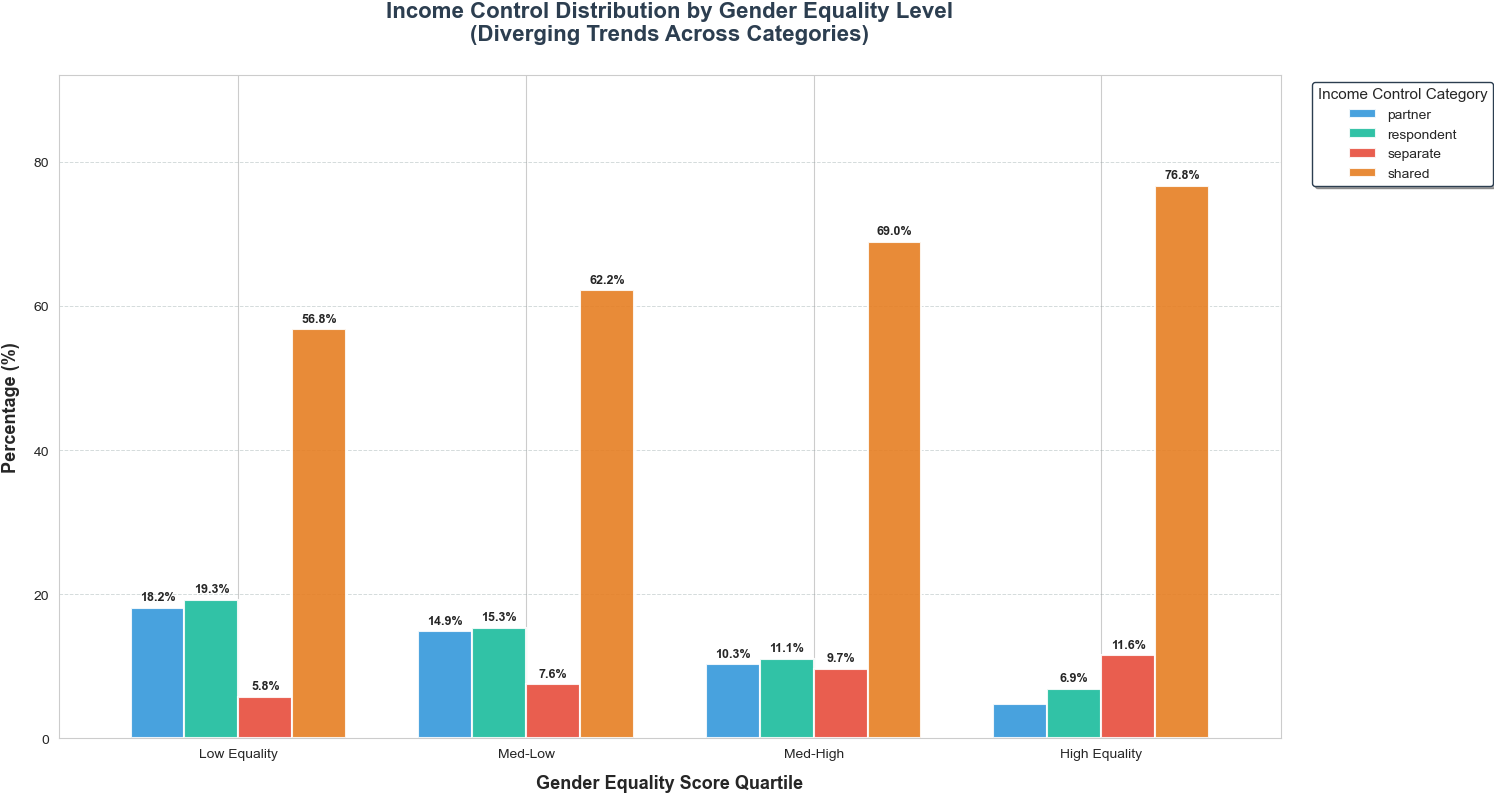

In [99]:
df_analysis = df_combined.copy()
print("CATEGORICAL OUTCOMES: Income Control & Household Division")


# Part 1: Income Control Analysis
print("\n1. INCOME CONTROL by Gender Equality Score")

df_income = df_analysis[['eg_score_norm', 'code_income_control', 'educ_4_label', 'sex']].dropna()

# Create equality score bins
df_income['eq_quartile'] = pd.qcut(df_income['eg_score_norm'], 
                                     q=4, 
                                     labels=['Low Equality', 'Med-Low', 'Med-High', 'High Equality'])

# Distribution by equality level
income_by_eq = df_income.groupby(['eq_quartile', 'code_income_control']).size().reset_index(name='count')
income_by_eq_total = df_income.groupby('eq_quartile').size().reset_index(name='total')
income_by_eq = income_by_eq.merge(income_by_eq_total, on='eq_quartile')
income_by_eq['percentage'] = (income_by_eq['count'] / income_by_eq['total']) * 100

print("\nIncome Control Distribution by Gender Equality Level:")
pivot_income = income_by_eq.pivot(index='eq_quartile', 
                                   columns='code_income_control', 
                                   values='percentage').fillna(0)

# Create grouped bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = False
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(15, 8))

# Color palette: Cool colors for decreasing trends, warm colors for increasing trends
# Based on typical patterns: "Mainly me" & "Shared equally" often decrease with equality
# "Mainly partner" & "Partner only" often increase with equality
colors = ['#3498db', '#1abc9c', '#e74c3c', '#e67e22']  # Blue, Teal, Red, Orange

# Plot grouped bars
pivot_income.plot(kind='bar', ax=ax, width=0.75, 
                 color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Styling
ax.set_xlabel('Gender Equality Score Quartile', fontsize=13, weight='bold', labelpad=10)
ax.set_ylabel('Percentage (%)', fontsize=13, weight='bold', labelpad=10)
ax.set_title('Income Control Distribution by Gender Equality Level\n(Diverging Trends Across Categories)', 
             fontsize=16, weight='bold', pad=25, color='#2c3e50')

# Enhanced legend with trend indicators
legend_labels = [f'{col}' for col in pivot_income.columns]
ax.legend(legend_labels, title='Income Control Category', title_fontsize=11, fontsize=10,
         bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True, 
         shadow=True, fancybox=True, edgecolor='#2c3e50')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=11)
ax.tick_params(axis='both', labelsize=10)

# Grid styling
ax.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.7, color='#95a5a6')
ax.set_axisbelow(True)

# Set y-axis limit
ax.set_ylim(0, max(pivot_income.max()) * 1.2)

# Add percentage labels on bars (only show if > 5%)
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 5 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9, weight='bold')

# Add trend arrows and annotations
# Analyze trends for each category
for i, col in enumerate(pivot_income.columns):
    values = pivot_income[col].values
    trend_change = values[-1] - values[0]  # Change from Low to High Equality
    
    # Position for annotation (above the bars)
    x_pos = 3.5 + i * 0.19  # Adjust based on bar width and spacing
    y_pos = max(pivot_income.max()) * 1.12
    
    if trend_change > 0:
        # Increasing trend
        ax.annotate('', xy=(x_pos, y_pos), xytext=(x_pos, y_pos - 2),
                   arrowprops=dict(arrowstyle='↑', color=colors[i], lw=3, alpha=0.8))
        ax.text(x_pos, y_pos + 1, '↑', fontsize=16, ha='center', 
               color=colors[i], weight='bold', alpha=0.9)
    else:
        # Decreasing trend
        ax.annotate('', xy=(x_pos, y_pos - 2), xytext=(x_pos, y_pos),
                   arrowprops=dict(arrowstyle='↓', color=colors[i], lw=3, alpha=0.8))
        ax.text(x_pos, y_pos + 1, '↓', fontsize=16, ha='center', 
               color=colors[i], weight='bold', alpha=0.9)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()
plt.show()

# Print trend summary
print("\n📊 TREND SUMMARY (Low → High Equality):")
for col in pivot_income.columns:
    values = pivot_income[col].values
    trend_change = values[-1] - values[0]
    trend_direction = "↑ INCREASING" if trend_change > 0 else "↓ DECREASING"
    print(f"  {col:20s}: {values[0]:5.1f}% → {values[-1]:5.1f}% ({trend_change:+5.1f}%) {trend_direction}")

# Chi-square test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_income['eq_quartile'], df_income['code_income_control'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test: chi2 = {chi2:.2f}, p-value = {p_value:.4e}")
if p_value < 0.001:
    print("✓✓✓ Highly significant association between equality and income control")
else:
    print("✗ No significant association")

In [91]:
df_income['eg_score_norm'].describe()

count    66598.000000
mean         0.533317
std          0.213002
min          0.000000
25%          0.372871
50%          0.519596
75%          0.688248
max          1.000000
Name: eg_score_norm, dtype: float64

In [92]:
round(np.quantile(df_income['eg_score_norm'], 0.25), 3), round(np.quantile(df_income['eg_score_norm'], 0.5),3), round(np.quantile(df_income['eg_score_norm'], 0.75),3), round(np.quantile(df_income['eg_score_norm'], 1),3)

(np.float64(0.373), np.float64(0.52), np.float64(0.688), np.float64(1.0))

In [80]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Data
df = df_analysis[['eg_score_norm', 'code_income_control']].dropna().copy()

# Normalize labels
df['code_income_control'] = df['code_income_control'].astype(str).str.strip().str.lower()

print("Categories:")
print(df['code_income_control'].value_counts())

# One-vs-rest logistic regression for each category
results = []
for cat in sorted(df['code_income_control'].unique()):
    y = (df['code_income_control'] == cat).astype(int)
    X = sm.add_constant(df[['eg_score_norm']])
    
    model = sm.Logit(y, X).fit(disp=False)
    beta = model.params['eg_score_norm']
    pval = model.pvalues['eg_score_norm']
    direction = "INCREASING" if beta > 0 else "DECREASING"
    
    results.append({
        'Category': cat,
        'Beta': beta,
        'p-value': pval,
        'Direction': direction,
        'N': int(y.sum())
    })

results_df = pd.DataFrame(results).sort_values('p-value')
print("\nOne-vs-rest results:")
print(results_df.to_string(index=False))

Categories:
code_income_control
shared        44443
respondent     8808
partner        8054
separate       5811
Name: count, dtype: int64

One-vs-rest results:
  Category      Beta       p-value  Direction     N
   partner -2.369915  0.000000e+00 DECREASING  8054
    shared  1.691752  0.000000e+00 INCREASING 44443
respondent -2.127187 9.889609e-306 DECREASING  8808
  separate  1.289527  2.117651e-88 INCREASING  5811


In [205]:

print("PERMUTATION TEST: Men vs Women Equality Score Distribution")

# Extract data
men_scores = df_combined[(df_combined['sex'] == 'Male') & (df_combined['employed'] == 0)]['eg_score_norm'].dropna().values
women_scores = df_combined[(df_combined['sex'] == 'Male') & (df_combined['employed'] == 1)]['eg_score_norm'].dropna().values

print(f"Men N = {len(men_scores)}, Women N = {len(women_scores)}")

if len(men_scores) == 0 or len(women_scores) == 0:
    print("Insufficient data for permutation test.")
else:
    # Observed difference in means (women - men)
    obs_diff = women_scores.mean() - men_scores.mean()
    
    # Permutation test
    n_perm = 10000
    combined = np.concatenate([men_scores, women_scores])
    n_men = len(men_scores)
    
    rng = np.random.default_rng(42)
    perm_diffs = np.empty(n_perm)
    
    for i in range(n_perm):
        rng.shuffle(combined)
        perm_men = combined[:n_men]
        perm_women = combined[n_men:]
        perm_diffs[i] = perm_women.mean() - perm_men.mean()
    
    # Two-sided p-value
    p_value = (np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)
    
    print(f"Observed mean difference (Women - Men): {obs_diff:+.4f}")
    print(f"Permutation p-value (two-sided): {p_value:.4f}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"✓ Significant difference in distributions (p < {alpha})")
    else:
        print(f"✗ No significant difference in distributions (p ≥ {alpha})")

PERMUTATION TEST: Men vs Women Equality Score Distribution
Men N = 11111, Women N = 21811
Observed mean difference (Women - Men): +0.0413
Permutation p-value (two-sided): 0.0001
✓ Significant difference in distributions (p < 0.05)


In [200]:
men_scores = df_combined[(df_combined['sex'] == 'Female') & (df_combined['employed'] == 0)]['eg_score'].dropna().values
women_scores = df_combined[(df_combined['sex'] == 'Female') & (df_combined['employed'] == 1)]['eg_score'].dropna().values

In [202]:
men_scores.mean(), women_scores.mean()

(np.float64(-0.18383285719663545), np.float64(0.2970358266158549))

## Comprehensive Analysis: Variables ↔ Gender Equality Score

We'll analyze:
1. **Predictors of eg_score_norm** - What influences gender equality attitudes?
2. **Outcomes of eg_score_norm** - How do gender equality attitudes influence behaviors/outcomes?

In [19]:
# First, let's prepare the data and identify variable types

print("STEP 1: DATA PREPARATION & VARIABLE CATEGORIZATION")


# Create analysis dataset
df_analysis = df_combined.copy()

# Identify numeric vs categorical variables
numeric_vars = []
categorical_vars = []
outcome_vars = []  # Variables that might be influenced by eg_score_norm

# Demographic/Background (Predictors of attitudes)
demographic_predictors = ['age', 'sex', 'educ_4', 'TOPBOT', 'urban_rural', 'marital', 
                          'HOMPOP', 'HHCHILDR', 'HHADULT', 'COUNTRY']

# Work-related (Both predictor and outcome)
work_vars = ['wrk_hrs', 'hh_wrk_hrs', 'work_status_std', 'spouse_work_status_std', 
             'SPWRKHRS', 'WWYKS', 'WWYKUS']

# Financial/Economic (Could be outcome of attitudes)
financial_vars = ['code_income_control', 'code_higher_income', 'SHARE_HH', 'SP_DEGREE']

# Household division (Outcomes of attitudes)
household_division = ['DIV_HH_COOK', 'DIV_HH_CLEAN', 'DIV_HH_GROC', 'DIV_HH_CARE', 'DIV_HH_LAUND']

# Attitudes/Satisfaction (Could be both)
attitude_vars = ['HW_FULFIL', 'WO_WANT', 'WW_FAM_SUFFER', 'WW_CHILD_SUFFER', 'WW_WARM',
                 'LIFE_HAP', 'DIFF_CONC_WORK', 'HH_TIRED', 'HH_FAM', 'WORK_TIRED', 
                 'HH_WEEKEND', 'SP_HH_FAM', 'SP_HH', 'LIVWOMAR', 'MOMORFAF', 'MEWH',
                 'HHTODD', 'FAM_DIF']

print("\nVariable Categories Identified:")
print(f"  Demographic/Background predictors: {len(demographic_predictors)}")
print(f"  Work-related variables: {len(work_vars)}")
print(f"  Financial variables: {len(financial_vars)}")
print(f"  Household division variables: {len(household_division)}")
print(f"  Attitude/Satisfaction variables: {len(attitude_vars)}")

# Get numeric columns for correlation
numeric_columns = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID and index columns
numeric_columns = [c for c in numeric_columns if c not in ['Unnamed: 0', 'CASEID', 'year', 'eg_score']]

print(f"\nTotal numeric variables for analysis: {len(numeric_columns)}")

STEP 1: DATA PREPARATION & VARIABLE CATEGORIZATION

Variable Categories Identified:
  Demographic/Background predictors: 10
  Work-related variables: 7
  Financial variables: 4
  Household division variables: 5
  Attitude/Satisfaction variables: 18

Total numeric variables for analysis: 16


In [20]:
print("STEP 2: CORRELATION ANALYSIS - What's Related to eg_score_norm?")

# Calculate correlations with eg_score_norm
correlations = []
for col in numeric_columns:
    if col != 'eg_score_norm' and df_analysis[col].notna().sum() > 100:
        # Remove NaN values for correlation
        valid_data = df_analysis[[col, 'eg_score_norm']].dropna()
        if len(valid_data) > 0:
            corr, p_val = spearmanr(valid_data[col], valid_data['eg_score_norm'])
            correlations.append({
                'Variable': col,
                'Correlation': corr,
                'P-value': p_val,
                'N': len(valid_data),
                'Significant': '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
            })

# Sort by absolute correlation
corr_df = pd.DataFrame(correlations)
corr_df['Abs_Corr'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Corr', ascending=False)

print("\nTop 20 Variables Correlated with Gender Equality Score:")
print(corr_df[['Variable', 'Correlation', 'P-value', 'Significant', 'N']].head(20).to_string(index=False))

STEP 2: CORRELATION ANALYSIS - What's Related to eg_score_norm?

Top 20 Variables Correlated with Gender Equality Score:
     Variable  Correlation       P-value Significant     N
       educ_4     0.310265  0.000000e+00         *** 69310
       TOPBOT     0.209737  0.000000e+00         *** 58826
        SP_HH    -0.145541 7.072577e-305         *** 65065
      wrk_hrs    -0.132425 4.312157e-159         *** 40827
   hh_wrk_hrs    -0.121597 1.741732e-215         *** 65902
      HHADULT    -0.109337 9.584608e-185         *** 69868
       HH_FAM    -0.101911  1.340243e-86         *** 37266
       HHTODD    -0.101330 1.012136e-117         *** 51553
       HOMPOP    -0.093020 4.660235e-134         *** 69868
     SPWRKHRS    -0.083910  1.332103e-61         *** 38819
     HHCHILDR    -0.066288  1.152109e-55         *** 56098
    SP_HH_FAM    -0.024105  5.157657e-07         *** 43367
          age    -0.019397  2.934132e-07         *** 69868
     F2_score     0.008658  2.211168e-02           * 

In [21]:
print("STEP 3: MULTIVARIATE REGRESSION - What Predicts eg_score_norm?")
print("(Controlling for multiple variables simultaneously)\n")


# Select key predictors based on theory and availability
predictor_vars = ['age', 'educ_4', 'TOPBOT', 'wrk_hrs', 'hh_wrk_hrs', 
                  'HHCHILDR', 'HHADULT', 'year']

# Add encoded categorical variables
df_reg_multi = df_analysis.copy()

# Encode sex
if 'sex' in df_reg_multi.columns:
    df_reg_multi['sex_numeric'] = (df_reg_multi['sex'] == 'Female').astype(int)
    predictor_vars.append('sex_numeric')

# Prepare data
X_vars = predictor_vars.copy()
df_model = df_reg_multi[X_vars + ['eg_score_norm']].dropna()

X = df_model[X_vars].values
y = df_model['eg_score_norm'].values

# Fit model
model_multi = LinearRegression()
model_multi.fit(X, y)

# Get results
coefficients = pd.DataFrame({
    'Variable': X_vars,
    'Coefficient': model_multi.coef_,
    'Abs_Coef': np.abs(model_multi.coef_)
}).sort_values('Abs_Coef', ascending=False)

r2_multi = model_multi.score(X, y)

print(f"Multiple R² = {r2_multi:.4f} ({r2_multi*100:.2f}% of variance explained)")
print(f"Intercept = {model_multi.intercept_:.4f}")
print(f"N = {len(df_model)}")

print("\n\nRegression Coefficients (Unstandardized):")
print(coefficients[['Variable', 'Coefficient']].to_string(index=False))

print("\n\nInterpretation:")
print("─" * 80)
for _, row in coefficients.iterrows():
    var = row['Variable']
    coef = row['Coefficient']
    direction = "increases" if coef > 0 else "decreases"
    print(f"  {var:20s}: +1 unit → eg_score_norm {direction} by {abs(coef):.4f}")

# Standardized coefficients for comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
y_std = StandardScaler().fit_transform(y.reshape(-1, 1)).ravel()

model_std_multi = LinearRegression()
model_std_multi.fit(X_std, y_std)

std_coefficients = pd.DataFrame({
    'Variable': X_vars,
    'Beta': model_std_multi.coef_,
    'Abs_Beta': np.abs(model_std_multi.coef_)
}).sort_values('Abs_Beta', ascending=False)

print("\n\nStandardized Coefficients (Beta) - Relative Importance:")
print(std_coefficients[['Variable', 'Beta']].to_string(index=False))
print("\nNote: Larger absolute values = stronger influence")

STEP 3: MULTIVARIATE REGRESSION - What Predicts eg_score_norm?
(Controlling for multiple variables simultaneously)

Multiple R² = 0.1767 (17.67% of variance explained)
Intercept = -3.9708
N = 28052


Regression Coefficients (Unstandardized):
   Variable  Coefficient
sex_numeric     0.073265
     educ_4     0.057621
    HHADULT    -0.017364
     TOPBOT     0.013754
   HHCHILDR    -0.005816
 hh_wrk_hrs    -0.002453
       year     0.002174
        age     0.001313
    wrk_hrs    -0.000531


Interpretation:
────────────────────────────────────────────────────────────────────────────────
  sex_numeric         : +1 unit → eg_score_norm increases by 0.0733
  educ_4              : +1 unit → eg_score_norm increases by 0.0576
  HHADULT             : +1 unit → eg_score_norm decreases by 0.0174
  TOPBOT              : +1 unit → eg_score_norm increases by 0.0138
  HHCHILDR            : +1 unit → eg_score_norm decreases by 0.0058
  hh_wrk_hrs          : +1 unit → eg_score_norm decreases by 0.0025
 

In [22]:
print("STEP 4: REVERSE ANALYSIS - How Does eg_score_norm Influence Other Variables?")
print("(Testing if gender equality attitudes predict behaviors/outcomes)\n")

# Key outcome variables to test (only numeric ones)
outcome_variables = {
    'hh_wrk_hrs': 'Household work hours',
    'wrk_hrs': 'Work hours',
    'TOPBOT': 'Social status (bottom-top)',
    'SPWRKHRS': 'Spouse work hours',
    'HOMPOP': 'Household population',
    'HHCHILDR': 'Number of children',
    'HHADULT': 'Number of adults',
}

reverse_results = []

for outcome_var, outcome_label in outcome_variables.items():
    if outcome_var in df_analysis.columns:
        # Check if numeric
        if not pd.api.types.is_numeric_dtype(df_analysis[outcome_var]):
            continue
            
        # Prepare data
        valid_data = df_analysis[['eg_score_norm', outcome_var, 'sex']].dropna()
        
        if len(valid_data) > 100:
            # Overall regression
            X_rev = valid_data['eg_score_norm'].values.reshape(-1, 1)
            y_rev = valid_data[outcome_var].values
            
            model_rev = LinearRegression()
            model_rev.fit(X_rev, y_rev)
            
            coef = model_rev.coef_[0]
            r2 = model_rev.score(X_rev, y_rev)
            
            # Test by gender
            male_data = valid_data[valid_data['sex'] == 'Male']
            female_data = valid_data[valid_data['sex'] == 'Female']
            
            male_coef, female_coef = None, None
            
            if len(male_data) > 50:
                X_m = male_data['eg_score_norm'].values.reshape(-1, 1)
                y_m = male_data[outcome_var].values
                model_m = LinearRegression()
                model_m.fit(X_m, y_m)
                male_coef = model_m.coef_[0]
            
            if len(female_data) > 50:
                X_f = female_data['eg_score_norm'].values.reshape(-1, 1)
                y_f = female_data[outcome_var].values
                model_f = LinearRegression()
                model_f.fit(X_f, y_f)
                female_coef = model_f.coef_[0]
            
            reverse_results.append({
                'Outcome': outcome_label,
                'Overall_Coef': coef,
                'R²': r2,
                'Male_Coef': male_coef,
                'Female_Coef': female_coef,
                'N': len(valid_data)
            })

reverse_df = pd.DataFrame(reverse_results)
reverse_df['Abs_Coef'] = reverse_df['Overall_Coef'].abs()
reverse_df = reverse_df.sort_values('Abs_Coef', ascending=False)

print("How 1-unit increase in eg_score_norm affects outcomes:\n")
print(reverse_df[['Outcome', 'Overall_Coef', 'R²', 'N']].to_string(index=False))

print("\n\nGender-Specific Effects:")
print(reverse_df[['Outcome', 'Male_Coef', 'Female_Coef']].to_string(index=False))

print("\n\nInterpretation Guide:")
print("  Positive coefficient: Higher gender equality → Higher value on outcome")
print("  Negative coefficient: Higher gender equality → Lower value on outcome")
print("  R² shows % of variance in outcome explained by gender equality attitudes")

STEP 4: REVERSE ANALYSIS - How Does eg_score_norm Influence Other Variables?
(Testing if gender equality attitudes predict behaviors/outcomes)

How 1-unit increase in eg_score_norm affects outcomes:

                   Outcome  Overall_Coef       R²     N
      Household work hours    -10.288783 0.023982 65902
                Work hours     -7.488935 0.011558 40827
         Spouse work hours     -4.006237 0.003534 38819
Social status (bottom-top)      1.711146 0.041006 58826
      Household population     -0.924196 0.013818 69868
          Number of adults     -0.556130 0.013120 69868
        Number of children     -0.342678 0.005013 56098


Gender-Specific Effects:
                   Outcome  Male_Coef  Female_Coef
      Household work hours  -4.815924   -17.653780
                Work hours  -5.745065    -3.180400
         Spouse work hours  -1.662990    -5.460879
Social status (bottom-top)   1.680137     1.765382
      Household population  -0.908861    -0.971659
          Number of

In [23]:
print("\n1. WHAT PREDICTS GENDER EQUALITY ATTITUDES (eg_score_norm)?")
print("   Top 5 correlates from Step 2:")
if len(corr_df) > 0:
    for idx, row in corr_df.head(5).iterrows():
        direction = "↑" if row['Correlation'] > 0 else "↓"
        print(f"   {direction} {row['Variable']:20s}: r = {row['Correlation']:+.3f} {row['Significant']}")

print("\n2. MULTIVARIATE MODEL RESULTS:")
print(f"   Combined predictors explain {r2_multi*100:.2f}% of variance")
print("   Most influential factors (from Step 3):")
for idx, row in std_coefficients.head(5).iterrows():
    direction = "↑" if row['Beta'] > 0 else "↓"
    print(f"   {direction} {row['Variable']:20s}: β = {row['Beta']:+.3f}")

print("\n3. HOW GENDER EQUALITY ATTITUDES INFLUENCE BEHAVIORS:")
print("   Strongest effects (from Step 4):")
if len(reverse_df) > 0:
    for idx, row in reverse_df.head(5).iterrows():
        direction = "↑" if row['Overall_Coef'] > 0 else "↓"
        print(f"   {direction} {row['Outcome']:30s}: b = {row['Overall_Coef']:+.3f}")

# print("\n\n📋 NEXT STEPS & ADVANCED ANALYSES:")
# print("─" * 80)

# print("\n1. For CAUSAL INFERENCE:")
# print("   • Fixed effects regression (controlling for individual/country)")
# print("   • Instrumental variable analysis")
# print("   • Difference-in-differences (using time variation)")

# print("\n2. For DEEPER UNDERSTANDING:")
# print("   • Mediation analysis: Does education → attitudes → behavior?")
# print("   • Moderation analysis: Does the effect vary by country/age?")
# print("   • Path analysis: Map multiple relationships simultaneously")

# print("\n3. For PREDICTION:")
# print("   • Random Forest / Gradient Boosting for non-linear effects")
# print("   • Cross-validation to test model generalizability")
# print("   • Feature importance from tree-based models")

# print("\n4. For SPECIFIC QUESTIONS:")
# print("   • Household division: Analyze all DIV_HH_* variables together")
# print("   • Work-life balance: Combine work hours, attitudes, satisfaction")
# print("   • Gender gaps: Compare Male vs Female coefficients systematically")

# print("\n5. For VISUALIZATION:")
# print("   • Correlation heatmap of top variables")
# print("   • Regression coefficient plots with confidence intervals")
# print("   • Partial dependence plots for key predictors")



1. WHAT PREDICTS GENDER EQUALITY ATTITUDES (eg_score_norm)?
   Top 5 correlates from Step 2:
   ↑ educ_4              : r = +0.310 ***
   ↑ TOPBOT              : r = +0.210 ***
   ↓ SP_HH               : r = -0.146 ***
   ↓ wrk_hrs             : r = -0.132 ***
   ↓ hh_wrk_hrs          : r = -0.122 ***

2. MULTIVARIATE MODEL RESULTS:
   Combined predictors explain 17.67% of variance
   Most influential factors (from Step 3):
   ↑ educ_4              : β = +0.248
   ↑ sex_numeric         : β = +0.171
   ↓ hh_wrk_hrs          : β = -0.135
   ↑ TOPBOT              : β = +0.113
   ↓ HHADULT             : β = -0.083

3. HOW GENDER EQUALITY ATTITUDES INFLUENCE BEHAVIORS:
   Strongest effects (from Step 4):
   ↓ Household work hours          : b = -10.289
   ↓ Work hours                    : b = -7.489
   ↓ Spouse work hours             : b = -4.006
   ↑ Social status (bottom-top)    : b = +1.711
   ↓ Household population          : b = -0.924


## no

In [ ]:
# print("="*80)
# print("MEDIATION ANALYSIS: Education → Gender Equality → Outcomes")
# print("="*80)
# print("\nTesting the causal pathway:")
# print("  Education → Gender Equality Attitudes → Behavioral Outcomes\n")

# # Prepare data for mediation
# df_mediation = df_analysis[['educ_4', 'eg_score_norm', 'hh_wrk_hrs', 'wrk_hrs', 
#                              'TOPBOT', 'HHCHILDR']].dropna()

# # Outcome variables to test
# outcomes = {
#     'hh_wrk_hrs': 'Household work hours',
#     'wrk_hrs': 'Work hours',
#     'TOPBOT': 'Social status',
#     'HHCHILDR': 'Number of children'
# }

# print("Testing mediation for each outcome:\n")
# print("="*80)

# mediation_results = []

# for outcome_var, outcome_label in outcomes.items():
#     print(f"\nOUTCOME: {outcome_label}")
#     print("─"*80)
    
#     # Step 1: Total effect (c path): Education → Outcome
#     X_total = df_mediation['educ_4'].values.reshape(-1, 1)
#     y_outcome = df_mediation[outcome_var].values
    
#     model_total = LinearRegression()
#     model_total.fit(X_total, y_outcome)
#     c_path = model_total.coef_[0]  # Total effect
    
#     # Step 2: a path: Education → Mediator (eg_score_norm)
#     y_mediator = df_mediation['eg_score_norm'].values
    
#     model_a = LinearRegression()
#     model_a.fit(X_total, y_mediator)
#     a_path = model_a.coef_[0]
    
#     # Step 3: b and c' paths: Education + Mediator → Outcome
#     X_mediated = df_mediation[['educ_4', 'eg_score_norm']].values
    
#     model_mediated = LinearRegression()
#     model_mediated.fit(X_mediated, y_outcome)
#     c_prime_path = model_mediated.coef_[0]  # Direct effect
#     b_path = model_mediated.coef_[1]  # Mediator effect
    
#     # Calculate indirect effect (mediation)
#     indirect_effect = a_path * b_path
    
#     # Proportion mediated
#     if c_path != 0:
#         prop_mediated = (indirect_effect / c_path) * 100
#     else:
#         prop_mediated = 0
    
#     print(f"  Path c (Total Effect):      Education → {outcome_label:25s} = {c_path:+.4f}")
#     print(f"  Path a (Education→Equality): Education → Gender Equality         = {a_path:+.4f}")
#     print(f"  Path b (Equality→Outcome):  Gender Equality → {outcome_label:25s} = {b_path:+.4f}")
#     print(f"  Path c' (Direct Effect):    Education → {outcome_label:25s} = {c_prime_path:+.4f}")
#     print(f"\n  Indirect Effect (a × b):    {indirect_effect:+.4f}")
#     print(f"  Proportion Mediated:        {prop_mediated:.1f}%")
    
#     if abs(prop_mediated) > 50:
#         interpretation = "STRONG mediation - Most effect goes through attitudes"
#     elif abs(prop_mediated) > 25:
#         interpretation = "MODERATE mediation - Partial effect through attitudes"
#     elif abs(prop_mediated) > 10:
#         interpretation = "WEAK mediation - Some effect through attitudes"
#     else:
#         interpretation = "NO meaningful mediation"
    
#     print(f"  Interpretation:             {interpretation}")
    
#     mediation_results.append({
#         'Outcome': outcome_label,
#         'Total_Effect': c_path,
#         'Direct_Effect': c_prime_path,
#         'Indirect_Effect': indirect_effect,
#         'Prop_Mediated': prop_mediated,
#         'a_path': a_path,
#         'b_path': b_path
#     })

# print("\n" + "="*80)
# print("SUMMARY: Mediation Effects")
# print("="*80)

# med_df = pd.DataFrame(mediation_results)
# print(med_df.to_string(index=False))

# print("\n\nKEY INSIGHTS:")
# print("─"*80)
# print("✓ If Indirect Effect has same sign as Total Effect → Gender equality mediates")
# print("✓ Proportion > 50% → Majority of education's effect works through attitudes")
# print("✓ Direct Effect close to 0 → Full mediation (all through attitudes)")
# print("✓ Direct Effect similar to Total → No mediation (attitudes don't explain it)")
# print("="*80)

In [ ]:
# # Prepare data
# df_reg = df_hypothesis[df_hypothesis['educ_4'].notna()].copy()

# print("MAGNITUDE & DIRECTION OF EDUCATION'S INFLUENCE ON GENDER EQUALITY SCORE")

# # 1. Simple Linear Regression
# X = df_reg['educ_4'].values.reshape(-1, 1)
# y = df_reg['eg_score_norm'].values

# model = LinearRegression()
# model.fit(X, y)

# # Unstandardized coefficient (raw)
# unstd_coef = model.coef_[0]
# intercept = model.intercept_
# r2 = model.score(X, y)

# print("\n1. UNSTANDARDIZED REGRESSION COEFFICIENT (Raw Scale)")
# print(f"   Coefficient: {unstd_coef:.4f}")
# print(f"   Intercept: {intercept:.4f}")
# print(f"   R² (variance explained): {r2:.4f} ({r2*100:.2f}%)")
# print(f"\n   INTERPRETATION:")
# print(f"   → Each 1-unit increase in education level increases eg_score_norm by {unstd_coef:.4f}")
# print(f"   → Education explains {r2*100:.2f}% of variance in gender equality scores")
# print(f"   → Direction: {'POSITIVE ↑' if unstd_coef > 0 else 'NEGATIVE ↓'}")

# # 2. Standardized coefficient (beta)
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_std = scaler_X.fit_transform(X)
# y_std = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# model_std = LinearRegression()
# model_std.fit(X_std, y_std)

# std_coef = model_std.coef_[0]

# print(f"\n2. STANDARDIZED REGRESSION COEFFICIENT (Beta)")
# print(f"   Beta: {std_coef:.4f}")
# print(f"\n   INTERPRETATION:")
# print(f"   → One standard deviation increase in education level")
# print(f"     increases eg_score_norm by {std_coef:.4f} standard deviations")
# print(f"   → Effect size: {abs(std_coef):.4f}")
# if abs(std_coef) < 0.1:
#     effect = "NEGLIGIBLE"
# elif abs(std_coef) < 0.3:
#     effect = "SMALL"
# elif abs(std_coef) < 0.5:
#     effect = "MEDIUM"
# else:
#     effect = "LARGE"
# print(f"   → Cohen's interpretation: {effect} effect")

# # 3. Mean differences between education levels
# print(f"\n3. MEAN DIFFERENCES BETWEEN CONSECUTIVE EDUCATION LEVELS")
# edu_levels = ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']
# means = []
# for edu in edu_levels:
#     mean_val = df_reg[df_reg['educ_4_label'] == edu]['eg_score_norm'].mean()
#     means.append(mean_val)
#     print(f"   {edu:30s}: Mean = {mean_val:.4f}")

# print(f"\n   Differences:")
# for i in range(len(edu_levels)-1):
#     diff = means[i+1] - means[i]
#     print(f"   {edu_levels[i]:30s} → {edu_levels[i+1]:30s}: +{diff:.4f}")

# # 4. Total effect (lowest to highest education)
# total_effect = means[-1] - means[0]
# print(f"\n   Total Effect (No/Primary → University+): {total_effect:.4f}")
# print(f"   This represents a {(total_effect/means[0])*100:.1f}% increase")

# # 5. Effect sizes (Cohen's d) between adjacent groups
# print(f"\n4. COHEN'S d EFFECT SIZES (Between Adjacent Education Levels)")
# for i in range(len(edu_levels)-1):
#     group1 = df_reg[df_reg['educ_4_label'] == edu_levels[i]]['eg_score_norm']
#     group2 = df_reg[df_reg['educ_4_label'] == edu_levels[i+1]]['eg_score_norm']
    
#     # Cohen's d = (mean1 - mean2) / pooled_std
#     mean_diff = group2.mean() - group1.mean()
#     pooled_std = np.sqrt(((len(group1)-1)*group1.std()**2 + (len(group2)-1)*group2.std()**2) / (len(group1)+len(group2)-2))
#     cohens_d = mean_diff / pooled_std
    
#     if abs(cohens_d) < 0.2:
#         interpretation = "NEGLIGIBLE"
#     elif abs(cohens_d) < 0.5:
#         interpretation = "SMALL"
#     elif abs(cohens_d) < 0.8:
#         interpretation = "MEDIUM"
#     else:
#         interpretation = "LARGE"
    
#     print(f"   {edu_levels[i]:30s} → {edu_levels[i+1]:30s}")
#     print(f"      Cohen's d = {cohens_d:.4f} ({interpretation})")

# # 6. Practical significance
# print(f"\n5. PRACTICAL SIGNIFICANCE")
# print(f"   Score range: 0 (low equality) to 1 (high equality)")
# print(f"   Average increase per education level: {unstd_coef:.4f}")
# print(f"   Total increase across all levels: {total_effect:.4f}")
# print(f"\n   In practical terms:")
# print(f"   → A person with university education scores {total_effect:.4f} points higher")
# print(f"     on gender equality (0-1 scale) than someone with no/primary education")
# print(f"   → This is a {(total_effect/1.0)*100:.1f}% shift on the full scale")

# print("\n" + "="*80)
# print("KEY FINDINGS:")
# print(f"✓ DIRECTION: {'POSITIVE' if unstd_coef > 0 else 'NEGATIVE'} - Higher education → Higher gender equality")
# print(f"✓ MAGNITUDE: +{unstd_coef:.4f} per education level (unstandardized)")
# print(f"✓ EFFECT SIZE: {effect} (β = {std_coef:.4f})")
# print(f"✓ VARIANCE EXPLAINED: {r2*100:.2f}% (R²)")
# print(f"✓ PRACTICAL IMPACT: {total_effect:.4f} point increase from lowest to highest education")

In [34]:
# # 1. Correlation Heatmap
# print("Creating correlation heatmap...")

# # Select key variables for correlation
# corr_vars = ['eg_score_norm', 'educ_4', 'age', 'TOPBOT', 'wrk_hrs', 'hh_wrk_hrs', 
#              'HHCHILDR', 'HHADULT', 'HOMPOP', 'SPWRKHRS']

# df_corr = df_analysis[corr_vars].dropna()
# correlation_matrix = df_corr.corr()

# # Create heatmap
# fig_heatmap = px.imshow(
#     correlation_matrix,
#     labels=dict(color="Correlation"),
#     x=correlation_matrix.columns,
#     y=correlation_matrix.columns,
#     color_continuous_scale='RdBu_r',
#     zmin=-1, zmax=1,
#     title='Correlation Heatmap: Key Variables & Gender Equality Score',
#     height=700,
#     width=800
# )

# # Add correlation values as text
# fig_heatmap.update_traces(
#     text=correlation_matrix.round(2).values,
#     texttemplate='%{text}',
#     textfont={"size": 10}
# )

# fig_heatmap.update_layout(
#     font=dict(size=12, family='Arial'),
#     title_font_size=16,
#     xaxis_title='',
#     yaxis_title='',
#     plot_bgcolor='white',
#     paper_bgcolor='white'
# )

# fig_heatmap.show()

# print("✓ Heatmap complete")

In [33]:
# # 2. Regression Coefficient Plot (Standardized)
# print("Creating coefficient plot...")

# # Use the standardized coefficients from earlier multivariate model
# coef_plot_data = std_coefficients.copy()
# coef_plot_data['Color'] = coef_plot_data['Beta'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# fig_coef = px.bar(
#     coef_plot_data,
#     x='Beta',
#     y='Variable',
#     orientation='h',
#     color='Color',
#     color_discrete_map={'Positive': '#2ecc71', 'Negative': '#e74c3c'},
#     title='Standardized Regression Coefficients: Predictors of Gender Equality Score',
#     labels={'Beta': 'Standardized Coefficient (β)', 'Variable': 'Predictor'},
#     text='Beta',
#     height=500,
#     width=800
# )

# fig_coef.update_traces(texttemplate='%{text:.3f}', textposition='outside')

# fig_coef.update_layout(
#     font=dict(size=12, family='Arial'),
#     title_font_size=16,
#     plot_bgcolor='white',
#     paper_bgcolor='white',
#     showlegend=False,
#     xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black')
# )

# fig_coef.show()

# print("✓ Coefficient plot complete")

In [32]:
# # 3. Mediation Path Diagram
# print("Creating mediation path diagram...")

# # Create a visual representation of the mediation model
# # Using the mediation results for household work hours as an example

# med_example = med_df[med_df['Outcome'] == 'Household work hours'].iloc[0]

# # Create path diagram using plotly shapes and annotations
# fig_path = go.Figure()

# # Set up coordinates for boxes
# edu_x, edu_y = 0.1, 0.5
# eq_x, eq_y = 0.5, 0.8
# outcome_x, outcome_y = 0.9, 0.5

# # Add boxes
# boxes = [
#     dict(x0=edu_x-0.08, x1=edu_x+0.08, y0=edu_y-0.08, y1=edu_y+0.08, 
#          fillcolor='lightblue', line=dict(color='blue', width=2)),
#     dict(x0=eq_x-0.08, x1=eq_x+0.08, y0=eq_y-0.08, y1=eq_y+0.08,
#          fillcolor='lightgreen', line=dict(color='green', width=2)),
#     dict(x0=outcome_x-0.08, x1=outcome_x+0.08, y0=outcome_y-0.08, y1=outcome_y+0.08,
#          fillcolor='lightyellow', line=dict(color='orange', width=2))
# ]

# for box in boxes:
#     fig_path.add_shape(type="rect", xref="x", yref="y", **box)

# # Add arrows
# # a path: Education -> Equality
# fig_path.add_annotation(
#     x=eq_x-0.08, y=eq_y-0.08, ax=edu_x+0.08, ay=edu_y+0.04,
#     xref="x", yref="y", axref="x", ayref="y",
#     showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="green"
# )

# # b path: Equality -> Outcome  
# fig_path.add_annotation(
#     x=outcome_x-0.08, y=outcome_y+0.04, ax=eq_x+0.08, ay=eq_y-0.08,
#     xref="x", yref="y", axref="x", ayref="y",
#     showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="green"
# )

# # c' path: Education -> Outcome (direct)
# fig_path.add_annotation(
#     x=outcome_x-0.08, y=outcome_y, ax=edu_x+0.08, ay=edu_y,
#     xref="x", yref="y", axref="x", ayref="y",
#     showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2, 
#     arrowcolor="red" if abs(med_example['Direct_Effect']) < abs(med_example['Total_Effect'])/2 else "blue"
# )

# # Add labels
# fig_path.add_annotation(x=edu_x, y=edu_y, text="Education<br>Level", showarrow=False, 
#                         font=dict(size=14, color="darkblue"), bgcolor="lightblue")
# fig_path.add_annotation(x=eq_x, y=eq_y, text="Gender<br>Equality<br>Attitudes", showarrow=False,
#                         font=dict(size=14, color="darkgreen"), bgcolor="lightgreen")
# fig_path.add_annotation(x=outcome_x, y=outcome_y, text="Household<br>Work Hours", showarrow=False,
#                         font=dict(size=14, color="darkorange"), bgcolor="lightyellow")

# # Add path coefficients
# fig_path.add_annotation(x=(edu_x+eq_x)/2, y=(edu_y+eq_y)/2+0.12, 
#                         text=f"a = {med_example['a_path']:.3f}", showarrow=False,
#                         font=dict(size=12, color="green"))
# fig_path.add_annotation(x=(eq_x+outcome_x)/2, y=(eq_y+outcome_y)/2+0.12,
#                         text=f"b = {med_example['b_path']:.3f}", showarrow=False,
#                         font=dict(size=12, color="green"))
# fig_path.add_annotation(x=(edu_x+outcome_x)/2, y=outcome_y-0.15,
#                         text=f"c' = {med_example['Direct_Effect']:.3f}<br>(was c = {med_example['Total_Effect']:.3f})", 
#                         showarrow=False, font=dict(size=12, color="red"))

# # Add indirect effect
# fig_path.add_annotation(x=0.5, y=0.3,
#                         text=f"<b>Indirect Effect (a×b) = {med_example['Indirect_Effect']:.3f}</b><br>" +
#                              f"<b>Mediation: {med_example['Prop_Mediated']:.1f}%</b>",
#                         showarrow=False, font=dict(size=14, color="purple"),
#                         bgcolor="lavender", bordercolor="purple", borderwidth=2)

# fig_path.update_layout(
#     title="Mediation Model: Education → Gender Equality → Household Work Hours",
#     xaxis=dict(range=[0, 1], showgrid=False, zeroline=False, showticklabels=False),
#     yaxis=dict(range=[0, 1], showgrid=False, zeroline=False, showticklabels=False),
#     height=500,
#     width=900,
#     plot_bgcolor='white',
#     paper_bgcolor='white',
#     font=dict(size=12, family='Arial'),
#     title_font_size=16
# )

# fig_path.show()

# print("✓ Mediation path diagram complete")

Advanced Analysis 4: Country-Specific & Time-Varying Effects

In [16]:
df_country = df_analysis[['COUNTRY', 'educ_4', 'eg_score_norm', 'year', 'sex']].dropna()

In [ ]:
# print("="*80)
# print("COUNTRY-SPECIFIC ANALYSIS: Education-Equality Relationship Varies by Country")
# print("="*80)

# # Prepare data
# df_country = df_analysis[['COUNTRY', 'educ_4', 'eg_score_norm', 'year', 'sex']].dropna()

# # Get top countries by sample size
# country_counts = df_country['COUNTRY'].value_counts()
# top_countries = country_counts.head(15).index.tolist()

# print(f"\nAnalyzing top {len(top_countries)} countries by sample size")
# print("─"*80)

# country_results = []

# for country in top_countries:
#     country_data = df_country[df_country['COUNTRY'] == country]
    
#     if len(country_data) > 100:
#         # Overall correlation
#         corr, p_val = spearmanr(country_data['educ_4'], country_data['eg_score_norm'])
        
#         # Regression coefficient
#         X_c = country_data['educ_4'].values.reshape(-1, 1)
#         y_c = country_data['eg_score_norm'].values
        
#         model_c = LinearRegression()
#         model_c.fit(X_c, y_c)
#         coef = model_c.coef_[0]
        
#         # Mean equality score
#         mean_eq = country_data['eg_score_norm'].mean()
        
#         country_results.append({
#             'Country': country,
#             'N': len(country_data),
#             'Correlation': corr,
#             'P-value': p_val,
#             'Coefficient': coef,
#             'Mean_Equality': mean_eq,
#             'Significant': '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
#         })

# country_df = pd.DataFrame(country_results)
# country_df = country_df.sort_values('Coefficient', ascending=False)

# print("\nEducation → Gender Equality Relationship by Country:")
# print("(Sorted by strength of relationship)\n")
# print(country_df[['Country', 'N', 'Coefficient', 'Correlation', 'Significant', 'Mean_Equality']].to_string(index=False))

# print("\n\nKEY INSIGHTS:")
# print("─"*80)
# strongest = country_df.iloc[0]
# weakest = country_df.iloc[-1]
# print(f"✓ Strongest effect: {strongest['Country']} (coef = {strongest['Coefficient']:.4f})")
# print(f"✓ Weakest effect:   {weakest['Country']} (coef = {weakest['Coefficient']:.4f})")
# print(f"✓ Range of coefficients: {country_df['Coefficient'].min():.4f} to {country_df['Coefficient'].max():.4f}")
# print(f"✓ Countries where education matters most: education → large equality gains")
# print(f"✓ Countries where education matters least: other factors more important")

# # Visualization
# print("\n" + "="*80)

COUNTRY-SPECIFIC ANALYSIS: Education-Equality Relationship Varies by Country

Analyzing top 15 countries by sample size
────────────────────────────────────────────────────────────────────────────────

Education → Gender Equality Relationship by Country:
(Sorted by strength of relationship)

               Country    N  Coefficient  Correlation Significant  Mean_Equality
   756. CH-Switzerland 1030     0.076387     0.358283         ***       0.630502
             FR-France 1098     0.067556     0.301380         ***       0.617980
           France (FR)  985     0.063823     0.282929         ***       0.549196
            Spain (ES) 1198     0.058497     0.339920         ***       0.513738
              CN-China 4504     0.052062     0.250716         ***       0.458444
        158. TW-Taiwan  937     0.049279     0.413829         ***       0.540377
             TW-Taiwan 1134     0.044539     0.268476         ***       0.483723
  710. ZA-South Africa  855     0.035347     0.177197      

GENDER EQUALITY OVER TIME: Mean Score by Gender and Year


Mean Gender Equality Score by Gender and Year:

Gender    Female      Male
Year                      
2002    0.519771  0.478434
2012    0.534163  0.497573
2022    0.605295  0.572255


GENDER GAP ANALYSIS:
────────────────────────────────────────────────────────────────────────────────
2002: Female - Male = +0.0413  (Women more egalitarian)
2012: Female - Male = +0.0366  (Women more egalitarian)
2022: Female - Male = +0.0330  (Women more egalitarian)



HYPOTHESIS TEST: Gender Equality Gap Trend Over Time

STEP 1: Calculate Annual Gender Gap
────────────────────────────────────────────────────────────────────────────────
2002: Male Mean = 0.4784, Female Mean = 0.5198
       Gap (F-M) = +0.0413 (women more egalitarian)
2012: Male Mean = 0.4976, Female Mean = 0.5342
       Gap (F-M) = +0.0366 (women more egalitarian)
2022: Male Mean = 0.5723, Female Mean = 0.6053
       Gap (F-M) = +0.0330 (women more egalitarian)


STEP 2: Linear Trend Test
────────────────────────────────────────────────────────────────────────────────

Regression Results:
  Slope (change per year): -0.000415
  Intercept: 0.0411
  R² (variance explained): 0.9931
  Standard Error (slope): 0.000035
  t-statistic: -11.9972
  p-value (two-tailed): 0.0529
  p-value (one-tailed, H₁: gap decreasing): 0.9735


STEP 3: Statistical Interpretation
────────────────────────────────────────────────────────────────────────────────
✓ DIRECTION: Negative slope (-0.000415)
  → Gap is D

In [ ]:
import numpy as np

print("="*80)
print("PERMUTATION TEST: Men vs Women Equality Score Distribution")
print("="*80)

# Extract data
men_scores = df_hypothesis[df_hypothesis['sex'] == 'Male']['eg_score'].dropna().values
women_scores = df_hypothesis[df_hypothesis['sex'] == 'Female']['eg_score'].dropna().values

print(f"Men N = {len(men_scores)}, Women N = {len(women_scores)}")

if len(men_scores) == 0 or len(women_scores) == 0:
    print("Insufficient data for permutation test.")
else:
    # Observed difference in means (women - men)
    obs_diff = women_scores.mean() - men_scores.mean()
    
    # Permutation test
    n_perm = 10000
    combined = np.concatenate([men_scores, women_scores])
    n_men = len(men_scores)
    
    rng = np.random.default_rng(42)
    perm_diffs = np.empty(n_perm)
    
    for i in range(n_perm):
        rng.shuffle(combined)
        perm_men = combined[:n_men]
        perm_women = combined[n_men:]
        perm_diffs[i] = perm_women.mean() - perm_men.mean()
    
    # Two-sided p-value
    p_value = (np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)
    
    print(f"Observed mean difference (Women - Men): {obs_diff:+.4f}")
    print(f"Permutation p-value (two-sided): {p_value:.4f}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"✓ Significant difference in distributions (p < {alpha})")
    else:
        print(f"✗ No significant difference in distributions (p ≥ {alpha})")

print("="*80)

PERMUTATION TEST: Men vs Women Equality Score Distribution
Men N = 34790, Women N = 39173
Observed mean difference (Women - Men): +0.1451
Permutation p-value (two-sided): 0.0001
✓ Significant difference in distributions (p < 0.05)


In [57]:
def work_status_map(x):
    if x in ['Paid work', 'Retired', 'Education', 'Apprentice/Trainee', 'Military/Community service']:
        return 'progressive'
    elif x in ['Domestic work', 'Unemployed']:
        return 'regressive'
    else:
        return 'other'

In [62]:
print("="*80)
print("SIMPLIFIED: CHI-SQUARE TESTS FOR EQUALITY SCORE & EMPLOYMENT")
print("="*80)

from scipy.stats import chi2_contingency

# ============================================================================
# WOMEN: Equality Score → Women's Own Employment Status
# ============================================================================
print("\n1. WOMEN: Gender Equality Score → Own Employment Status")
print("─"*80)

# Filter for women
df_women_chi = df_hypothesis[df_hypothesis['sex'] == 'Female'].copy()

# Create binary employment variable
df_women_chi['employed'] = df_women_chi['work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

# Create quartiles of equality score
df_women_chi['eq_quartile'] = pd.qcut(
    df_women_chi['eg_score_norm'], 
    q=4, 
    labels=['Q1 (Low Equality)', 'Q2', 'Q3', 'Q4 (High Equality)'],
    duplicates='drop'
)

# Remove missing values
df_women_chi_clean = df_women_chi[['eq_quartile', 'employed']].dropna()

print(f"Sample size: {len(df_women_chi_clean)} women")
print(f"Employment rate: {df_women_chi_clean['employed'].mean()*100:.1f}%\n")

# Create contingency table and show percentages
contingency_women = pd.crosstab(df_women_chi_clean['eq_quartile'], 
                                 df_women_chi_clean['employed'], 
                                 margins=False)

# Add row percentages
contingency_women_pct = pd.crosstab(df_women_chi_clean['eq_quartile'], 
                                      df_women_chi_clean['employed'], 
                                      normalize='index') * 100

print("Contingency Table (Row %): Women's Employment by Equality Quartile")
display_table = contingency_women_pct.copy()
display_table.columns = ['Not Employed', 'Employed']
display_table = display_table.round(1)
print(display_table)

# Chi-square test
chi2_w, p_w, dof_w, expected_w = chi2_contingency(contingency_women)

# Calculate Cramér's V effect size
n_w = contingency_women.values.sum()
min_dim = min(contingency_women.shape) - 1
cramers_v_w = np.sqrt(chi2_w / (n_w * min_dim)) if min_dim > 0 else 0

print(f"\nChi-Square Test Results:")
print(f"  χ² = {chi2_w:.4f}")
print(f"  p-value = {p_w:.4f}")
print(f"  Cramér's V = {cramers_v_w:.4f} (effect size)")

if p_w < 0.05:
    print(f"\n  ✓ SIGNIFICANT ASSOCIATION (p < 0.05)")
    trend = "INCREASE" if contingency_women_pct.iloc[-1, 1] > contingency_women_pct.iloc[0, 1] else "DECREASE"
    print(f"  Employment rates {trend} across equality quartiles")
else:
    print(f"\n  ✗ NO SIGNIFICANT ASSOCIATION (p ≥ 0.05)")

# ============================================================================
# MEN: Equality Score → Spouse's Employment Status
# ============================================================================
print("\n\n2. MEN: Gender Equality Score → Spouse's Employment Status")
print("─"*80)

# Filter for men
df_men_chi = df_hypothesis[df_hypothesis['sex'] == 'Male'].copy()

# Create binary spouse employment variable
df_men_chi['spouse_employed'] = df_men_chi['spouse_work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

# Create quartiles of equality score
df_men_chi['eq_quartile'] = pd.qcut(
    df_men_chi['eg_score_norm'], 
    q=4, 
    labels=['Q1 (Low Equality)', 'Q2', 'Q3', 'Q4 (High Equality)'],
    duplicates='drop'
)

# Remove missing values
df_men_chi_clean = df_men_chi[['eq_quartile', 'spouse_employed']].dropna()

print(f"Sample size: {len(df_men_chi_clean)} men")
print(f"Spouse employment rate: {df_men_chi_clean['spouse_employed'].mean()*100:.1f}%\n")

# Create contingency table and show percentages
contingency_men = pd.crosstab(df_men_chi_clean['eq_quartile'], 
                               df_men_chi_clean['spouse_employed'], 
                               margins=False)

contingency_men_pct = pd.crosstab(df_men_chi_clean['eq_quartile'], 
                                    df_men_chi_clean['spouse_employed'], 
                                    normalize='index') * 100

print("Contingency Table (Row %): Spouse's Employment by Men's Equality Quartile")
display_table = contingency_men_pct.copy()
display_table.columns = ['Spouse Not Employed', 'Spouse Employed']
display_table = display_table.round(1)
print(display_table)

# Chi-square test
chi2_m, p_m, dof_m, expected_m = chi2_contingency(contingency_men)

# Calculate Cramér's V effect size
n_m = contingency_men.values.sum()
min_dim = min(contingency_men.shape) - 1
cramers_v_m = np.sqrt(chi2_m / (n_m * min_dim)) if min_dim > 0 else 0

print(f"\nChi-Square Test Results:")
print(f"  χ² = {chi2_m:.4f}")
print(f"  p-value = {p_m:.4f}")
print(f"  Cramér's V = {cramers_v_m:.4f} (effect size)")

if p_m < 0.05:
    print(f"\n  ✓ SIGNIFICANT ASSOCIATION (p < 0.05)")
    trend = "INCREASE" if contingency_men_pct.iloc[-1, 1] > contingency_men_pct.iloc[0, 1] else "DECREASE"
    print(f"  Spouse employment rates {trend} across men's equality quartiles")
else:
    print(f"\n  ✗ NO SIGNIFICANT ASSOCIATION (p ≥ 0.05)")

# ============================================================================
# SUMMARY & COMPARISON
# ============================================================================
print("\n\n" + "="*80)
print("SUMMARY: PARALLEL CHI-SQUARE TESTS")
print("="*80)

summary_data = {
    'Group': ['Women (own employment)', 'Men (spouse employment)'],
    'N': [len(df_women_chi_clean), len(df_men_chi_clean)],
    'χ²': [f"{chi2_w:.4f}", f"{chi2_m:.4f}"],
    'p-value': [f"{p_w:.4f}", f"{p_m:.4f}"],
    'Cramér\'s V': [f"{cramers_v_w:.4f}", f"{cramers_v_m:.4f}"],
    'Significant?': ['Yes' if p_w < 0.05 else 'No', 'Yes' if p_m < 0.05 else 'No']
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

print("\n\nINTERPRETATION:")
print("─"*80)
if p_w < 0.05 and p_m < 0.05:
    print("✓ Both relationships are significant:")
    print(f"  • Women with higher equality scores are more likely to work")
    print(f"  • Men with higher equality scores have more working spouses")
    print(f"  • This suggests gender equality attitudes enable/support workforce participation")
elif p_w < 0.05 or p_m < 0.05:
    print(f"⊘ Only one relationship is significant:")
    if p_w < 0.05:
        print(f"  • Women's equality scores DO predict their employment")
        print(f"  • Men's equality scores DO NOT predict spouse employment")
    else:
        print(f"  • Women's equality scores DO NOT predict their employment")
        print(f"  • Men's equality scores DO predict spouse employment")
else:
    print("✗ Neither relationship is significant at p < 0.05")
    print("  Equality scores do not significantly predict employment patterns")

print("\n" + "="*80)

SIMPLIFIED: CHI-SQUARE TESTS FOR EQUALITY SCORE & EMPLOYMENT

1. WOMEN: Gender Equality Score → Own Employment Status
────────────────────────────────────────────────────────────────────────────────
Sample size: 39173 women
Employment rate: 54.3%

Contingency Table (Row %): Women's Employment by Equality Quartile
                    Not Employed  Employed
eq_quartile                               
Q1 (Low Equality)           61.0      39.0
Q2                          50.2      49.8
Q3                          39.5      60.5
Q4 (High Equality)          29.0      71.0

Chi-Square Test Results:
  χ² = 2118.4160
  p-value = 0.0000
  Cramér's V = 0.2325 (effect size)

  ✓ SIGNIFICANT ASSOCIATION (p < 0.05)
  Employment rates INCREASE across equality quartiles


2. MEN: Gender Equality Score → Spouse's Employment Status
────────────────────────────────────────────────────────────────────────────────
Sample size: 34790 men
Spouse employment rate: 49.4%

Contingency Table (Row %): Spouse's Emp

In [30]:
# # Visualization: Country comparison
# print("Creating country comparison visualization...")

# fig_country = px.bar(
#     country_df.head(15),
#     x='Country',
#     y='Coefficient',
#     color='Mean_Equality',
#     title='Education → Gender Equality Relationship Strength by Country<br><sub>Top 15 Countries by Sample Size</sub>',
#     labels={'Coefficient': 'Regression Coefficient (Education → Equality)', 
#             'Mean_Equality': 'Mean Equality Score'},
#     color_continuous_scale='Viridis',
#     height=600,
#     width=1000
# )

# fig_country.update_layout(
#     font=dict(size=12, family='Arial'),
#     title_font_size=16,
#     plot_bgcolor='white',
#     paper_bgcolor='white',
#     xaxis_tickangle=-45
# )

# fig_country.update_xaxes(showgrid=False)
# fig_country.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray',
#                          zeroline=True, zerolinewidth=2, zerolinecolor='black')

# fig_country.show()

# print("✓ Country comparison complete")

# older plots

In [11]:
# Calculate overall gender distribution by year
overall_gender = df_combined.groupby(['year', 'sex']).size().reset_index(name='total_count')
overall_gender['overall_percentage'] = overall_gender.groupby('year')['total_count'].transform(lambda x: x / x.sum() * 100)

# Calculate gender distribution for each income control type by year
control_gender = df_combined.groupby(['year', 'code_income_control', 'sex']).size().reset_index(name='count')
control_gender['percentage'] = control_gender.groupby(['year', 'code_income_control'])['count'].transform(lambda x: x / x.sum() * 100)

# Merge with overall gender distribution
control_gender = control_gender.merge(overall_gender[['year', 'sex', 'overall_percentage']], on=['year', 'sex'])

# Calculate normalized percentage (actual percentage divided by expected percentage)
control_gender['normalized_percentage'] = (control_gender['percentage'] / control_gender['overall_percentage']) 

# Create stacked bar chart with normalized values
fig2 = px.bar(control_gender, 
              x='code_income_control', 
              y='normalized_percentage',
              color='sex',
              facet_col='year',
              title='Gender Distribution Across Financial Control Types by Year (Normalized)',
              labels={'normalized_percentage': 'Normalized Percentage', 'code_income_control': 'Financial Control Type', 'sex': 'Gender'},
              color_discrete_map={'Female': '#E377C2', 'Male': '#1F77B4'},
              text='normalized_percentage',
              height=500)

fig2.update_traces(texttemplate='%{text:.1f}', textposition='inside')

In [12]:

# Prepare distribution data (percentage within year+gender)
edu_dist = df_combined.groupby(['year', 'sex', 'educ_4_label']).size().reset_index(name='count')
edu_total = df_combined.groupby(['year', 'sex']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year', 'sex'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

# Ensure discrete x-axis ordering
edu_dist['year'] = edu_dist['year'].astype(str)

# Keep original labels; only enforce lowest -> highest order
category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
    'sex': ['Male', 'Female'],
    'year': ['2002', '2012', '2022']
}

# Consistent color mapping for original labels
edu_colors = {
    'No/Primary': "#f48181",
    'Secondary': "#e69e5f",
    'Post-sec / Short tertiary': "#75e575",
    'University+': "#69b4e9"
}

fig_edu_pub = px.bar(
    edu_dist,
    x='year',
    y='percentage',
    color='educ_4_label',
    facet_row='sex',
    barmode='stack',
    category_orders=category_orders,
    color_discrete_map=edu_colors,
    title='Education Level Distribution by Gender Across Years (100% Stacked)',
    labels={
        'percentage': 'Share (%)',
        'year': 'Year',
        'educ_4_label': 'Education Level'
    },
    height=700
)

# Clean, publication-friendly styling
fig_edu_pub.update_layout(
    font=dict(size=14, family='Arial'),
    title_font_size=18,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    margin=dict(l=60, r=30, t=70, b=60),
)

fig_edu_pub.update_xaxes(showgrid=False)
fig_edu_pub.update_yaxes(range=[0, 100], showgrid=True, gridwidth=1, gridcolor='lightgray')

# Show figure
fig_edu_pub.show()

In [13]:
# First, let's explore the eg_score_norm distribution and check for missing values
print("EG Score Statistics:")
print(df_combined['eg_score_norm'].describe())
print(f"\nMissing values: {df_combined['eg_score_norm'].isna().sum()}")
print(f"Total records: {len(df_combined)}")

# Create a cleaned dataset for analysis
df_eg_analysis = df_combined[df_combined['eg_score_norm'].notna()].copy()
print(f"\nRecords with valid EG score: {len(df_eg_analysis)}")

EG Score Statistics:
count    73963.000000
mean         0.531842
std          0.206643
min          0.000000
25%          0.375000
50%          0.500000
75%          0.666667
max          1.000000
Name: eg_score_norm, dtype: float64

Missing values: 0
Total records: 73963

Records with valid EG score: 73963


In [14]:
# Bar chart showing mean EG score by education level over time
eg_by_education_year = df_eg_analysis.groupby(['year', 'educ_4_label'])['eg_score_norm'].agg(['mean', 'median', 'std', 'count']).reset_index()

category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
}

fig_eg_edu_bar = px.bar(eg_by_education_year,
                        x='year',
                        y='mean',
                        color='educ_4_label',
                        barmode='group',
                        title='Average Gender Equality Score by Education Level Across Time<br><sub>Comparing Educational Groups Over Years</sub>',
                        labels={'mean': 'Mean Gender Equality Score',
                                'year': 'Year',
                                'educ_4_label': 'Education Level'},
                        color_discrete_sequence=px.colors.qualitative.Set2,
                        category_orders=category_orders,
                        text='mean',
                        height=500)

fig_eg_edu_bar.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig_eg_edu_bar.update_layout(
    font=dict(size=12, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level'
)

fig_eg_edu_bar.update_xaxes(showgrid=False)
fig_eg_edu_bar.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_bar.show()

In [15]:
# Box plot showing distribution of EG score by education level over time
# Calculate correlations between education and EG score for each year
edu_to_num = {
    'No/Primary': 1,
    'Secondary': 2,
    'Post-sec / Short tertiary': 3,
    'University+': 4
}

correlation_data = []
for year in [2002, 2012, 2022]:
    year_data = df_eg_analysis[df_eg_analysis['year'] == year].copy()
    year_data['edu_num'] = year_data['educ_4_label'].map(edu_to_num)
    corr = year_data[['edu_num', 'eg_score_norm']].corr().iloc[0, 1]
    correlation_data.append({'year': year, 'correlation': corr})

corr_df = pd.DataFrame(correlation_data)
corr_df['year_label'] = corr_df.apply(lambda x: f"{int(x['year'])}<br>corr={x['correlation']:.3f}", axis=1)

category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
}

fig_eg_edu_box = px.box(df_eg_analysis,
                        x='year',
                        y='eg_score_norm',
                        color='educ_4_label',
                        title='Gender Equality Score Distribution by Education Level Across Time<br><sub>Comparing Educational Groups Over Years</sub>',
                        labels={'eg_score_norm': 'Gender Equality Score',
                                'year': 'Year',
                                'educ_4_label': 'Education Level'},
                        color_discrete_sequence=px.colors.qualitative.Set2,
                        category_orders=category_orders,
                        height=500)

# Update x-axis with correlation values
fig_eg_edu_box.update_xaxes(
    ticktext=corr_df['year_label'].tolist(),
    tickvals=corr_df['year'].tolist(),
    showgrid=False
)

fig_eg_edu_box.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_box.update_layout(
    font=dict(size=25, family='Arial'),
    title_font_size=27.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    boxmode='group'
)

fig_eg_edu_box.show()

In [16]:
# Distribution of education level and financial control over years - side by side subplots
years_to_plot = [2002, 2012, 2022]
df_plot = df_combined[df_combined['year'].isin(years_to_plot)].copy()

# Prepare education data
edu_dist_year = df_plot.groupby(['year', 'educ_4_label']).size().reset_index(name='count')
edu_dist_year_total = df_plot.groupby('year').size().reset_index(name='total')
edu_dist_year = edu_dist_year.merge(edu_dist_year_total, on='year')
edu_dist_year['percentage'] = (edu_dist_year['count'] / edu_dist_year['total']) * 100

# Prepare financial control data (remove NaN values)
df_control = df_plot[df_plot['code_income_control'].notna()].copy()
control_dist_year = df_control.groupby(['year', 'code_income_control']).size().reset_index(name='count')
control_dist_year_total = df_control.groupby('year').size().reset_index(name='total')
control_dist_year = control_dist_year.merge(control_dist_year_total, on='year')
control_dist_year['percentage'] = (control_dist_year['count'] / control_dist_year['total']) * 100

# Define colors
edu_colors = {
    'No/Primary': "#f48181",
    'Secondary': "#e69e5f",
    'Post-sec / Short tertiary': "#75e575",
    'University+': "#69b4e9"
}

# Create figure with secondary_y
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Education Level Distribution', 'Financial Control Distribution'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}]],
    horizontal_spacing=0.15
)

# Add education data to first subplot
for edu_level in ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']:
    edu_data = edu_dist_year[edu_dist_year['educ_4_label'] == edu_level]
    fig.add_trace(
        go.Bar(
            x=edu_data['year'],
            y=edu_data['percentage'],
            name=edu_level,
            marker_color=edu_colors[edu_level],
            text=edu_data['percentage'].round(1),
            textposition='inside',
            textfont=dict(size=10),
            showlegend=True
        ),
        row=1, col=1
    )

# Add financial control data to second subplot
control_types_sorted = sorted(df_control['code_income_control'].unique())
control_colors = px.colors.qualitative.Set2

for i, control_type in enumerate(control_types_sorted):
    control_data = control_dist_year[control_dist_year['code_income_control'] == control_type]
    fig.add_trace(
        go.Bar(
            x=control_data['year'],
            y=control_data['percentage'],
            name=control_type,
            marker_color=control_colors[i % len(control_colors)],
            text=control_data['percentage'].round(1),
            textposition='inside',
            textfont=dict(size=10),
            showlegend=True,
            legendgroup='control'
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    title_text='Distribution of Education Level and Financial Control Over Years',
    title_font_size=16,
    height=550,
    width=900,
    font=dict(size=12, family='Arial'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    barmode='stack',
    hovermode='x unified'
)

# Update y-axes
fig.update_yaxes(
    range=[0, 100],
    title_text='Percentage (%)',
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    row=1, col=1
)

fig.update_yaxes(
    range=[0, 100],
    title_text='Percentage (%)',
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    row=1, col=2
)

# Update x-axes
fig.update_xaxes(
    title_text='Year',
    showgrid=False,
    row=1, col=1
)

fig.update_xaxes(
    title_text='Year',
    showgrid=False,
    row=1, col=2
)

fig.show()

In [25]:
# Create binned version of eg_score_norm
df_combined['eg_score_binned'] = pd.cut(df_combined['eg_score_norm'], 
                                         bins=10, 
                                         labels=[f'{i/10:.1f}-{(i+1)/10:.1f}' for i in range(10)])

# Calculate education distribution by EG score bins, gender, and year
eg_edu_binned = df_combined.groupby(['year', 'eg_score_binned', 'sex', 'educ_4_label']).size().reset_index(name='count')
eg_edu_binned_total = df_combined.groupby(['year', 'eg_score_binned', 'sex']).size().reset_index(name='total')
eg_edu_binned = eg_edu_binned.merge(eg_edu_binned_total, on=['year', 'eg_score_binned', 'sex'])
eg_edu_binned['percentage'] = eg_edu_binned['count'] / eg_edu_binned['total'] * 100

# Stacked bar chart faceted by gender and year
fig_eg_edu_binned = px.bar(eg_edu_binned,
                            x='eg_score_binned',
                            y='percentage',
                            color='educ_4_label',
                            facet_col='sex',
                            facet_row='year',
                            title='Education Level by Gender Equality Score (Binned) and Gender Across Years<br><sub>How Education Relates to Gender Equality Attitudes</sub>',
                            labels={'percentage': 'Percentage (%)',
                                    'eg_score_binned': 'Gender Equality Score Range',
                                    'educ_4_label': 'Education Level'},
                            color_discrete_sequence=px.colors.qualitative.Set2,
                            height=900)

fig_eg_edu_binned.update_layout(
    font=dict(size=11, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    barmode='stack'
)

fig_eg_edu_binned.update_xaxes(showgrid=False, tickangle=-90)
fig_eg_edu_binned.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_binned.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_64890/140907853.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_64890/140907853.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [22]:
# Create age groups for better visualization
df_combined['age_group'] = pd.cut(df_combined['age'], 
                                   bins=[18, 30, 40, 50, 60, 70, 100],
                                   labels=['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])

# Calculate education distribution by age group, gender, and year
edu_by_age_gender = df_combined.groupby(['year', 'age_group', 'sex', 'educ_4_label']).size().reset_index(name='count')
edu_by_age_gender_total = df_combined.groupby(['year', 'age_group', 'sex']).size().reset_index(name='total')
edu_by_age_gender = edu_by_age_gender.merge(edu_by_age_gender_total, on=['year', 'age_group', 'sex'])
edu_by_age_gender['percentage'] = edu_by_age_gender['count'] / edu_by_age_gender['total'] * 100

# Create a combined column for x-axis grouping
edu_by_age_gender['age_gender'] = edu_by_age_gender['age_group'].astype(str) + ' - ' + edu_by_age_gender['sex'].str[0]

# Grouped bar chart with gender side-by-side, faceted by year
fig_edu_age = px.bar(edu_by_age_gender,
                     x='age_gender',
                     y='percentage',
                     color='educ_4_label',
                     facet_col='year',
                     barmode='stack',
                     title='Education Level Distribution by Age Group and Gender Across Years<br><sub>Male and Female Side-by-Side Comparison</sub>',
                     labels={'percentage': 'Percentage (%)',
                             'age_gender': 'Age Group - Gender',
                             'educ_4_label': 'Education Level'},
                     color_discrete_sequence=px.colors.qualitative.Set2,
                     height=500)

fig_edu_age.update_layout(
    font=dict(size=12, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level'
)

# Add vertical lines to separate age groups
age_groups_list = ['18-30', '31-40', '41-50', '51-60', '61-70', '70+']
for i in range(len(age_groups_list) - 1):
    # Add line between age groups (after Female of each group)
    fig_edu_age.add_vline(x=i * 2 + 1.5, line_width=2, line_dash="dash", line_color="gray", opacity=0.5)

fig_edu_age.update_xaxes(showgrid=False, tickangle=-90)
fig_edu_age.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_edu_age.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_64890/3260674707.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_64890/3260674707.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [23]:
df_combined['TOPBOT'] = df_combined[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_64890/2871864256.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [26]:
# Line chart showing how control types evolve with age
control_age_line = df_combined.groupby(['year', 'age', 'code_income_control']).size().reset_index(name='count')
control_age_total = df_combined.groupby(['year', 'age']).size().reset_index(name='total')
control_age_line = control_age_line.merge(control_age_total, on=['year', 'age'])
control_age_line['percentage'] = control_age_line['count'] / control_age_line['total'] * 100

# Filter to reasonable age range for smoother visualization
control_age_line = control_age_line[(control_age_line['age'] >= 18) & (control_age_line['age'] <= 80)]

fig_control_age_trend = px.line(control_age_line,
                                 x='age',
                                 y='percentage',
                                 color='code_income_control',
                                 facet_col='year',
                                 title='Financial Control Patterns Across Age by Year<br><sub>Trends in Control Arrangements by Age Over Time</sub>',
                                 labels={'percentage': 'Percentage (%)',
                                         'age': 'Age',
                                         'code_income_control': 'Financial Control'},
                                 color_discrete_sequence=px.colors.qualitative.Set1,
                                 height=500)

fig_control_age_trend.update_layout(
    font=dict(size=12, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        title='Financial Control',
        orientation="h",
        yanchor="top",
        y=-0.15,
        xanchor="center",
        x=0.5
    )
)

fig_control_age_trend.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig_control_age_trend.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_control_age_trend.show()